# EDE2 Project1
### Created by Saurav Bhowmick and Nooreldin Alkiswani
### Date: 27-05-2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and Clean the Data

filepaths = [
    "Actual Generation per Production Type_201901010000-202001010000.csv",
    "Actual Generation per Production Type_202001010000-202101010000.csv",
    "Actual Generation per Production Type_202101010000-202201010000.csv",
    "Actual Generation per Production Type_202201010000-202301010000.csv",
    "Actual Generation per Production Type_202301010000-202401010000.csv"
]

list_actual_gen = [pd.read_csv(file) for file in filepaths]
df_actual_gen = pd.concat(list_actual_gen)

# Display the first few rows to understand the structure
print(df_actual_gen.head())

        Area                                             MTU  \
0  BZN|DE-LU  01.01.2019 00:00 - 01.01.2019 00:15 (CET/CEST)   
1  BZN|DE-LU  01.01.2019 00:15 - 01.01.2019 00:30 (CET/CEST)   
2  BZN|DE-LU  01.01.2019 00:30 - 01.01.2019 00:45 (CET/CEST)   
3  BZN|DE-LU  01.01.2019 00:45 - 01.01.2019 01:00 (CET/CEST)   
4  BZN|DE-LU  01.01.2019 01:00 - 01.01.2019 01:15 (CET/CEST)   

   Biomass  - Actual Aggregated [MW]  \
0                             4812.0   
1                             4828.0   
2                             4834.0   
3                             4851.0   
4                             4834.0   

   Fossil Brown coal/Lignite  - Actual Aggregated [MW]  \
0                                             6932.0     
1                                             6351.0     
2                                             6221.0     
3                                             5836.0     
4                                             5471.0     

  Fossil Coal-derived gas

Data Cleaning

In [3]:

# Replacing missing values with NaN
df_actual_gen.replace('n/e', np.nan, inplace=True)

# Drop columns where all values are NaN
df_actual_gen.dropna(axis=1, how='all', inplace=True)

# Extract the date from 'MTU' and convert to datetime
df_actual_gen['Date'] = pd.to_datetime(df_actual_gen['MTU'].str.split(' - ', expand=True)[0], format="%d.%m.%Y %H:%M")

# Set the 'Date' as the index
df_actual_gen.set_index('Date', inplace=True)

# Drop the 'MTU' column as it's no longer needed
df_actual_gen.drop(columns=['MTU'], inplace=True)

# Display the info to check the data types
print(df_actual_gen.info())

# Check the first few rows to verify the data
print(df_actual_gen.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175316 entries, 2019-01-01 00:00:00 to 2023-12-31 23:45:00
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Area                                                       175316 non-null  object 
 1   Biomass  - Actual Aggregated [MW]                          175292 non-null  float64
 2   Fossil Brown coal/Lignite  - Actual Aggregated [MW]        175296 non-null  float64
 3   Fossil Coal-derived gas  - Actual Aggregated [MW]          20924 non-null   object 
 4   Fossil Gas  - Actual Aggregated [MW]                       175292 non-null  float64
 5   Fossil Hard coal  - Actual Aggregated [MW]                 175296 non-null  float64
 6   Fossil Oil  - Actual Aggregated [MW]                       175296 non-null  float64
 7   Geothermal  - Actual Aggregated [MW]             

In [4]:
df_actual_gen.head(100)

Area  Biomass  - Actual Aggregated [MW]  \
Date                                                                
2019-01-01 00:00:00  BZN|DE-LU                             4812.0   
2019-01-01 00:15:00  BZN|DE-LU                             4828.0   
2019-01-01 00:30:00  BZN|DE-LU                             4834.0   
2019-01-01 00:45:00  BZN|DE-LU                             4851.0   
2019-01-01 01:00:00  BZN|DE-LU                             4834.0   
...                        ...                                ...   
2019-01-01 23:45:00  BZN|DE-LU                             4742.0   
2019-01-02 00:00:00  BZN|DE-LU                             4674.0   
2019-01-02 00:15:00  BZN|DE-LU                             4674.0   
2019-01-02 00:30:00  BZN|DE-LU                             4677.0   
2019-01-02 00:45:00  BZN|DE-LU                             4545.0   

                     Fossil Brown coal/Lignite  - Actual Aggregated [MW]  \
Date                                                                       
2019-01-01 00:00:00                                             6932.0     
2019-01-01 00:15:00                                             6351.0     
2019-01-01 00:30:00                                             6221.0     
2019-01-01 00:45:00                                             5836.0     
2019-01-01 01:00:00                                             5471.0     
...                                                                ...     
2019-01-01 23:45:00                                             4920.0     
2019-01-02 00:00:00                                             5152.0     
2019-01-02 00:15:00                                             5149.0     
2019-01-02 00:30:00                                             5139.0     
2019-01-02 00:45:00                                             5110.0     

                    Fossil Coal-derived gas  - Actual Aggregated [MW]  \
Date                                                                    
2019-01-01 00:00:00                                               273   
2019-01-01 00:15:00                                               481   
2019-01-01 00:30:00                                               481   
2019-01-01 00:45:00                                               481   
2019-01-01 01:00:00                                               481   
...                                                               ...   
2019-01-01 23:45:00                                               444   
2019-01-02 00:00:00                                               273   
2019-01-02 00:15:00                                               445   
2019-01-02 00:30:00                                               445   
2019-01-02 00:45:00                                               445   

                     Fossil Gas  - Actual Aggregated [MW]  \
Date                                                        
2019-01-01 00:00:00                                3410.0   
2019-01-01 00:15:00                                3295.0   
2019-01-01 00:30:00                                3228.0   
2019-01-01 00:45:00                                3194.0   
2019-01-01 01:00:00                                3071.0   
...                                                   ...   
2019-01-01 23:45:00                                2809.0   
2019-01-02 00:00:00                                2746.0   
2019-01-02 00:15:00                                2708.0   
2019-01-02 00:30:00                                2738.0   
2019-01-02 00:45:00                                2716.0   

                     Fossil Hard coal  - Actual Aggregated [MW]  \
Date                                                              
2019-01-01 00:00:00                                      3345.0   
2019-01-01 00:15:00                                      2918.0   
2019-01-01 00:30:00                                      2594.0   
2019-01-01 00:45:00                                      239

In [5]:
# Filter the DataFrame to keep only the "Fossil Gas - Actual Aggregated [MW]" column
df_fossil_gas = df_actual_gen[['Fossil Gas  - Actual Aggregated [MW]']]

# Drop rows with NaN values in this column
df_fossil_gas.dropna(inplace=True)

# Display the first few rows to verify
print(df_fossil_gas.head())

# Ensure the index is sorted
df_fossil_gas = df_fossil_gas.sort_index()



                     Fossil Gas  - Actual Aggregated [MW]
Date                                                     
2019-01-01 00:00:00                                3410.0
2019-01-01 00:15:00                                3295.0
2019-01-01 00:30:00                                3228.0
2019-01-01 00:45:00                                3194.0
2019-01-01 01:00:00                                3071.0


<Figure size 1008x504 with 0 Axes>

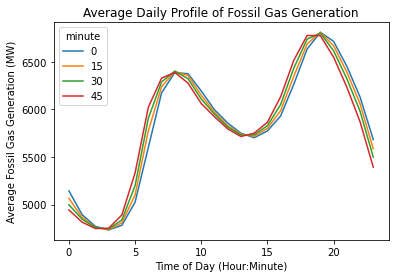

In [6]:
# Extract hour and minute from the index for grouping
df_fossil_gas['hour'] = df_fossil_gas.index.hour
df_fossil_gas['minute'] = df_fossil_gas.index.minute

# Group by hour and minute to get the average profile
quarter_hour_avg = df_fossil_gas.groupby(['hour', 'minute'])['Fossil Gas  - Actual Aggregated [MW]'].mean().unstack()

# Plotting the average daily profile with 15-minute intervals
plt.figure(figsize=(14, 7))
quarter_hour_avg.plot(title='Average Daily Profile of Fossil Gas Generation', xlabel='Time of Day (Hour:Minute)', ylabel='Average Fossil Gas Generation (MW)')
plt.show()

minute           0            15           30           45
hour                                                      
0       5144.161555  5064.606791  4998.996166  4943.915068
1       4894.667397  4866.625753  4847.490959  4816.003286
2       4772.163746  4761.095838  4758.625958  4749.089814
3       4734.645674  4736.296276  4743.467141  4752.146769
4       4783.032859  4809.730011  4839.508215  4891.558598


<Figure size 1008x504 with 0 Axes>

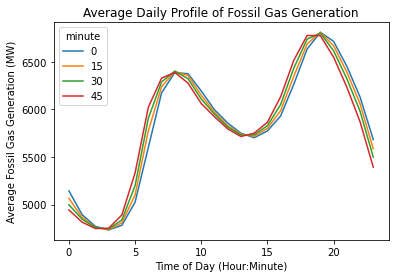

In [7]:
# Check the grouped data
print(quarter_hour_avg.head())

# Plot the data if it's not empty
if not quarter_hour_avg.empty:
    plt.figure(figsize=(14, 7))
    quarter_hour_avg.plot(title='Average Daily Profile of Fossil Gas Generation', xlabel='Time of Day (Hour:Minute)', ylabel='Average Fossil Gas Generation (MW)')
    plt.show()
else:
    print("The grouped data is empty.")

# Task 1: Visualizations



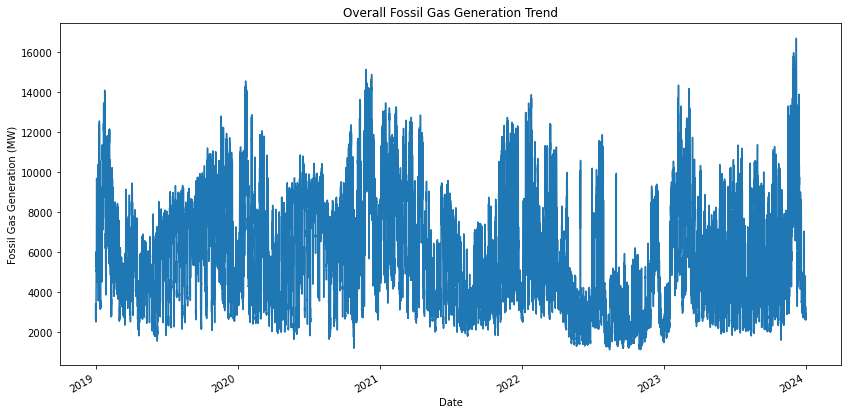

In [8]:
# Overall Trend of Fossil Gas Generation Over the Years
# Credits: DataCamp
plt.figure(figsize=(14, 7))
df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].plot(title='Overall Fossil Gas Generation Trend', xlabel='Date', ylabel='Fossil Gas Generation (MW)')
plt.show()

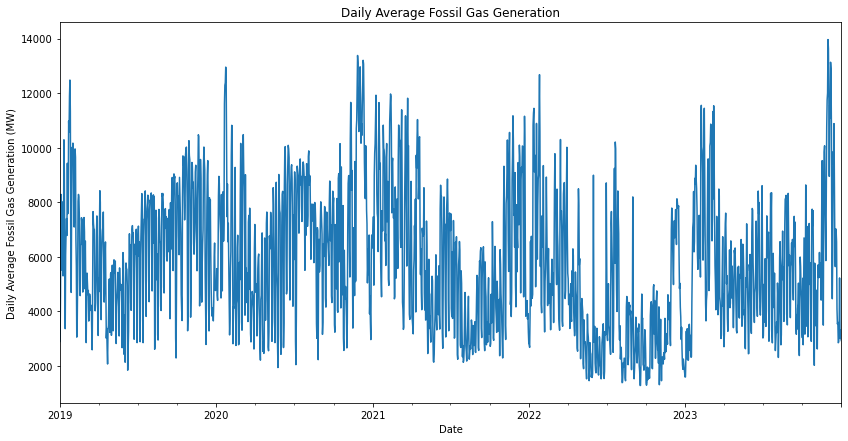

In [9]:
# Daily Average trend
# Credits: DataCamp
daily_avg = df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].resample('D').mean()
plt.figure(figsize=(14, 7))
daily_avg.plot(title='Daily Average Fossil Gas Generation', xlabel='Date', ylabel='Daily Average Fossil Gas Generation (MW)')
plt.show()

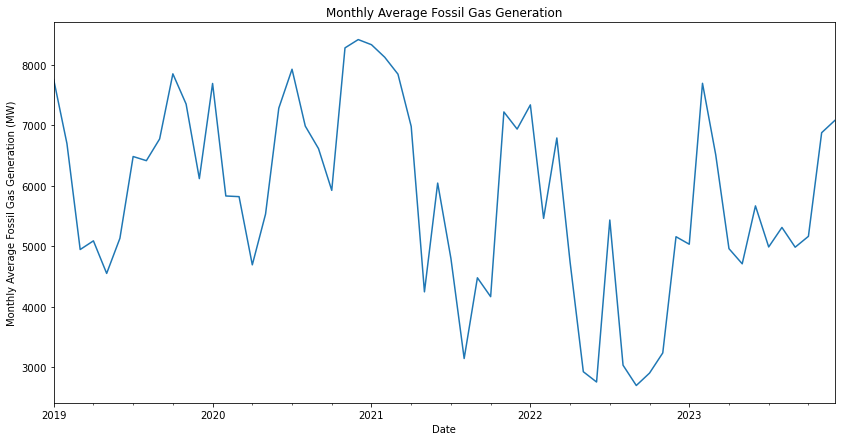

In [10]:
# Monthly Average trend
# Credits: DataCamp
monthly_avg = df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].resample('M').mean()
plt.figure(figsize=(14, 7))
monthly_avg.plot(title='Monthly Average Fossil Gas Generation', xlabel='Date', ylabel='Monthly Average Fossil Gas Generation (MW)')
plt.show()

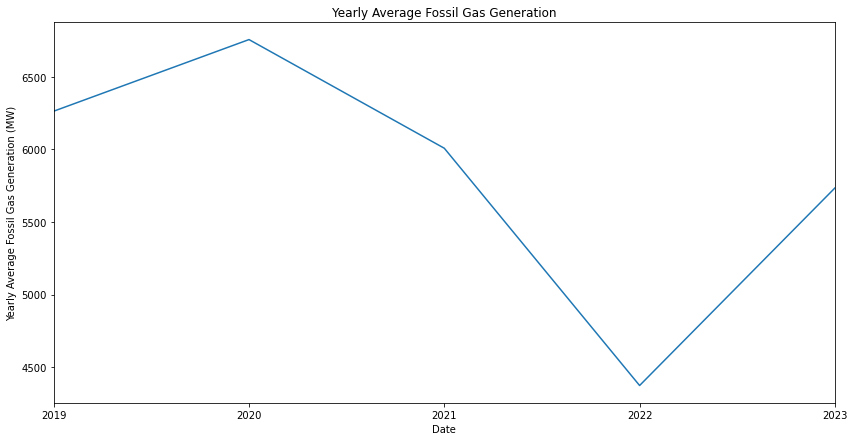

In [11]:
# Yearly Average trend
# Credits: DataCamp
yearly_avg = df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].resample('Y').mean()
plt.figure(figsize=(14, 7))
yearly_avg.plot(title='Yearly Average Fossil Gas Generation', xlabel='Date', ylabel='Yearly Average Fossil Gas Generation (MW)')
plt.show()

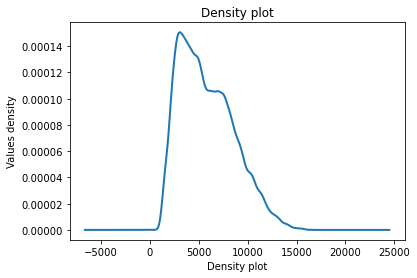

In [12]:
# Density plot of Fossil Gas Generation Over the Years
# Credits: Prof. Dr. Lämmle
ax3 = df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].plot(kind='density', linewidth=2)
ax3.set_xlabel('Density plot')
ax3.set_ylabel('Values density')
ax3.set_title('Density plot')
plt.show()

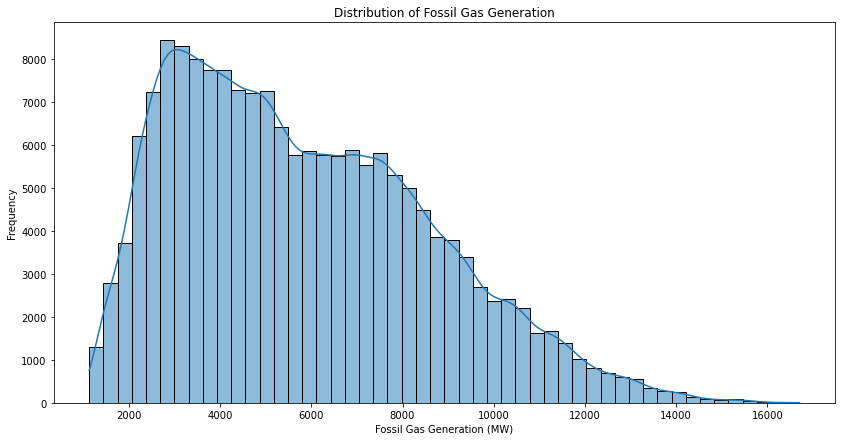

In [13]:
# Distribution of Fossil Gas Generation Values
# Credits: DataCamp
plt.figure(figsize=(14, 7))
sns.histplot(df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].dropna(), kde=True, bins=50)
plt.title('Distribution of Fossil Gas Generation')
plt.xlabel('Fossil Gas Generation (MW)')
plt.ylabel('Frequency')
plt.show()


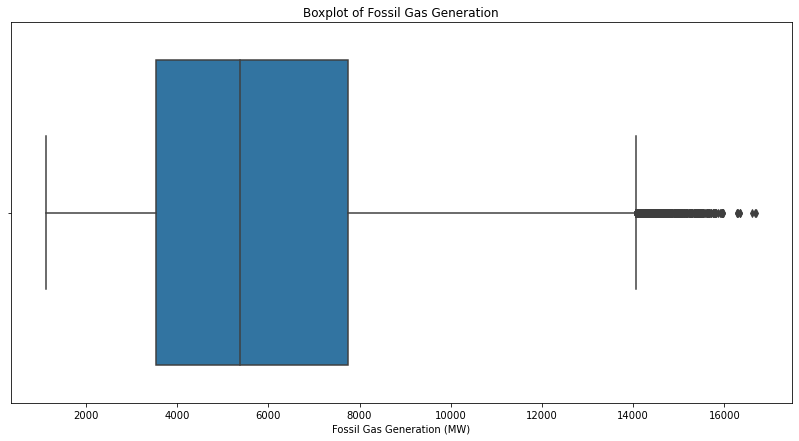

In [14]:
# Boxplot to Show the Spread and Any Outliers in the Data
# Credits: DataCamp
plt.figure(figsize=(14, 7))
sns.boxplot(x=df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].dropna())
plt.title('Boxplot of Fossil Gas Generation')
plt.xlabel('Fossil Gas Generation (MW)')
plt.show()


<Figure size 1008x504 with 0 Axes>

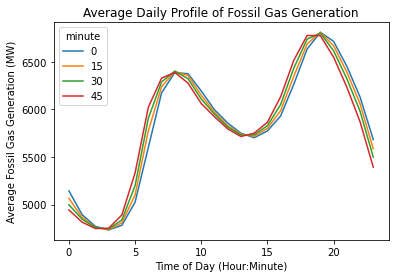

In [15]:
# Average Daily Profile with 15-minute Intervals
# Credits: DataCamp & ChatGPT

# Extract hour and minute from the index for grouping
df_fossil_gas['hour'] = df_fossil_gas.index.hour
df_fossil_gas['minute'] = df_fossil_gas.index.minute

# Group by hour and minute to get the average profile
quarter_hour_avg = df_fossil_gas.groupby(['hour', 'minute'])['Fossil Gas  - Actual Aggregated [MW]'].mean().unstack() #ChatGPT

# Plotting the average daily profile with 15-minute intervals
plt.figure(figsize=(14, 7))
quarter_hour_avg.plot(title='Average Daily Profile of Fossil Gas Generation', xlabel='Time of Day (Hour:Minute)', ylabel='Average Fossil Gas Generation (MW)') #DataCamp
plt.show()


In [16]:
df_actual_gen.columns

Index(['Area', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Nuclear  - Actual Aggregated [MW]', 'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]'],
      dtype='object')

### Calculating the sum of Fossil gas source:

In [17]:
# Calculating the sum of total energy generated:
energy_sources = ['Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Nuclear  - Actual Aggregated [MW]', 'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]']

# Convert columns to numeric, coerce errors to NaN
df_actual_gen[energy_sources] = df_actual_gen[energy_sources].apply(pd.to_numeric, errors='coerce')

# Calculating the sum of Fossil gas sources:
fossilGas_sum = df_actual_gen["Fossil Gas  - Actual Aggregated [MW]"].sum(skipna=True)

print(f"Total Fossil Gas Energy Generated: {fossilGas_sum:.2f} MW")

# Calculating the sum of total energy generated:
total_energy = df_actual_gen[energy_sources].sum().sum(skipna=True)

print(f"Total Energy Generated: {total_energy} MW")

Total Fossil Gas Energy Generated: 1021475960.00 MW
Total Energy Generated: 10154156514.0 MW


In [18]:
#Calculating the share of fossil gas for the entire time period(2019-2023):
share_of_fossilGas = (fossilGas_sum / total_energy) * 100

print(f"The share of fossil gas for the entire time period is: {share_of_fossilGas:.2f}%")

The share of fossil gas for the entire time period is: 10.06%


### Pie Chart

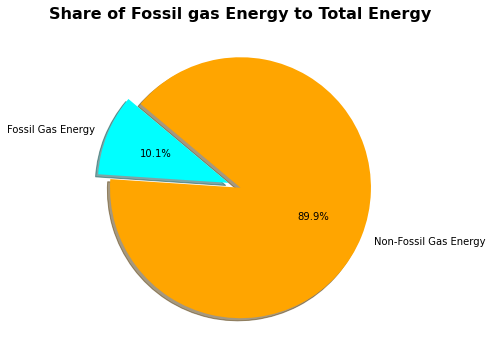

In [19]:
# Calculated share_of_non_fossilgas as a percentage :
share_of_non_fossilGas = 100 - share_of_fossilGas  # Accessing the first value

# Pie Chart - 1 : 
# Color palette :
colors = ['cyan' , 'orange']

# Making sizes_renewable positive :
sizes_fossilgas = [max(0, share_of_fossilGas), max(0, share_of_non_fossilGas)]

# Creating Pie Chart: Share of Renewable Energy to Total Energy
labels_energies = ['Fossil Gas Energy', 'Non-Fossil Gas Energy']
explode_fossilgas = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(sizes_fossilgas, explode=explode_fossilgas, labels=labels_energies, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Share of Fossil gas Energy to Total Energy', fontsize=16, fontweight='bold')
plt.show()

# Task 2: Trend and Seasonal Decomposition

Identifiy trend and seasonal components

► Use a model of your choice

► Decide on an additive or multiplicative model

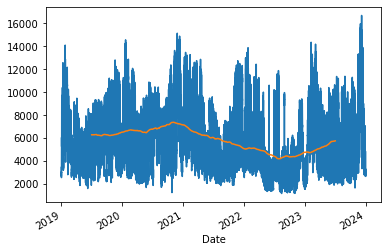

In [20]:
#Credits: Prof. Dr. Lämmle for teaching seasonal decomposition, used the code taught in lecture.
#seeing whether additive or multiplicative model will fit
df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].plot()
df_fossil_gas['moving_average']=df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].rolling(window=365*24*4, center=True).mean() #set window to 15 mins for annual values
df_fossil_gas['moving_average'].plot()
plt.show()

In [21]:
df_fos=pd.DataFrame()
df_fos['Fossil gas generation']=df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'].dropna()

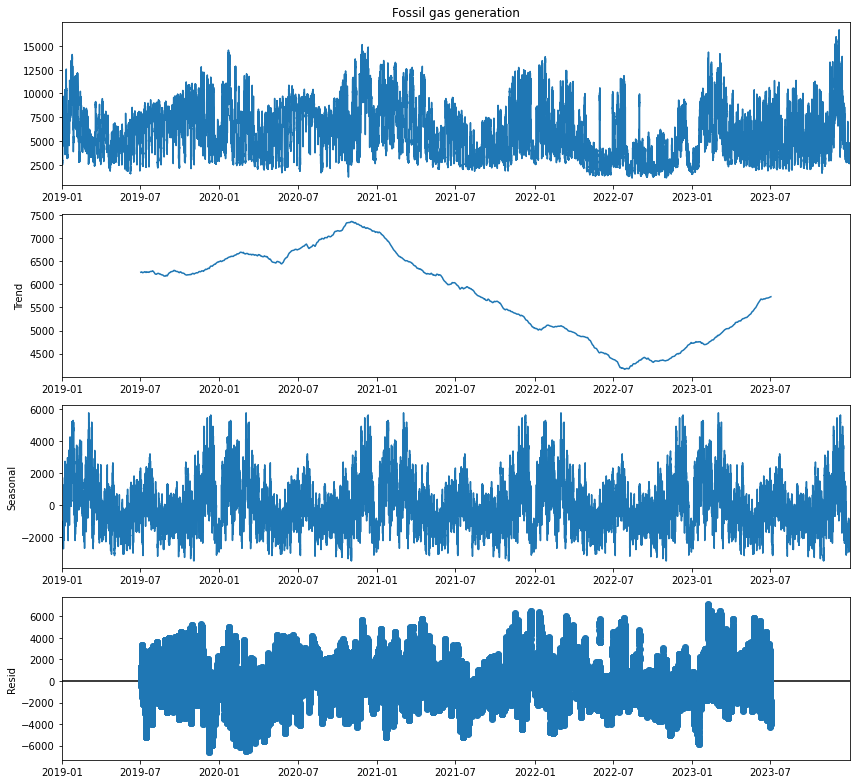

In [22]:
#Credits: Prof. Dr. Lämmle
tsa_decomposed = sm.tsa.seasonal_decompose(df_fos['Fossil gas generation'],  period = 365*24*4, model='additive') 
#additive because Seasonal grow is almost varying around 6000

plt.rcParams['figure.figsize'] = 12, 11
fig = tsa_decomposed.plot()
plt.show()

# Task 3: Decomposition of daily profiles


* Identify daily profiles of your trend- and seasonally adjusted time series

* Decide on an additive or multiplicative model 
* Youdon‘t have to differentiate between summer/winter, weekdays/weekends, etc. to identify typical daily profiles for each case separately. 
* Evaluate the quality of your fit using appropriate statistical indicators and visualizations


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

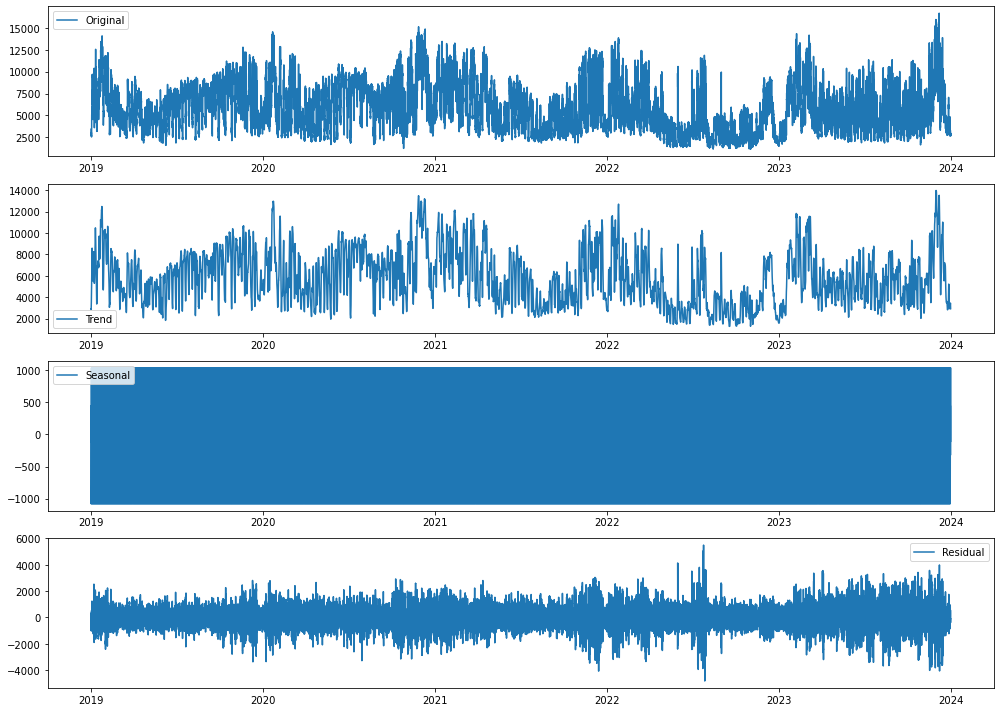

In [24]:
# Trend and Seasonal Decomposition:
#Credits: Prof. Dr. Lämmle
decomposition = sm.tsa.seasonal_decompose(df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'], model='additive', period=24*4)

df_fossil_gas['trend'] = decomposition.trend
df_fossil_gas['seasonal'] = decomposition.seasonal
df_fossil_gas['residual'] = decomposition.resid


# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df_fossil_gas['trend'], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df_fossil_gas['seasonal'], label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df_fossil_gas['residual'], label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Comment: We observed the graphs which is in the longer version and we can see that no data is changing exponentially. So, we can take our models as additive.

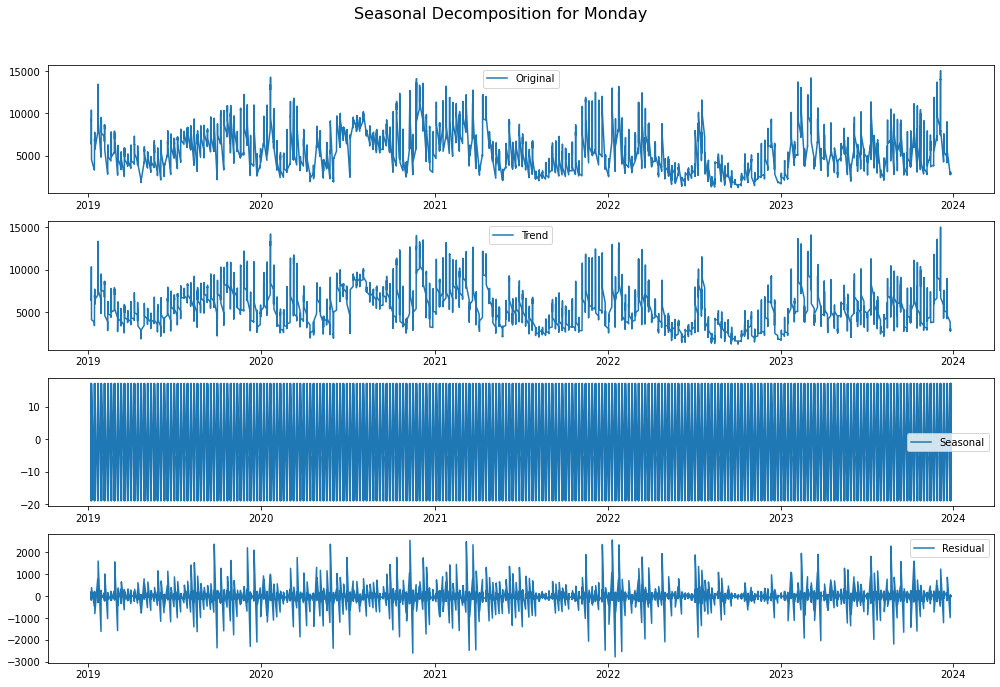

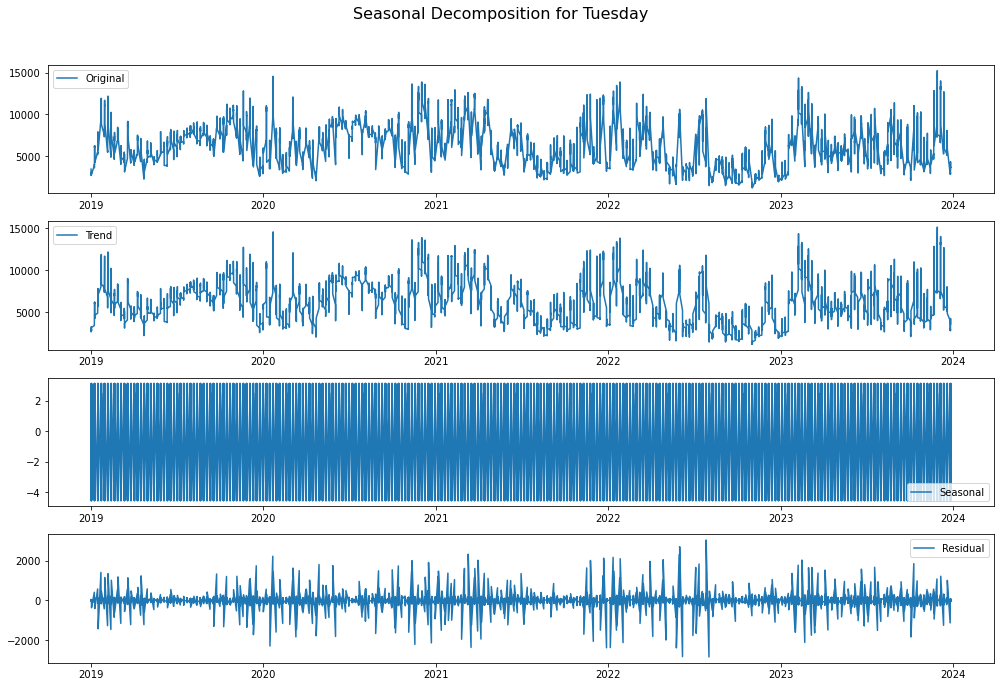

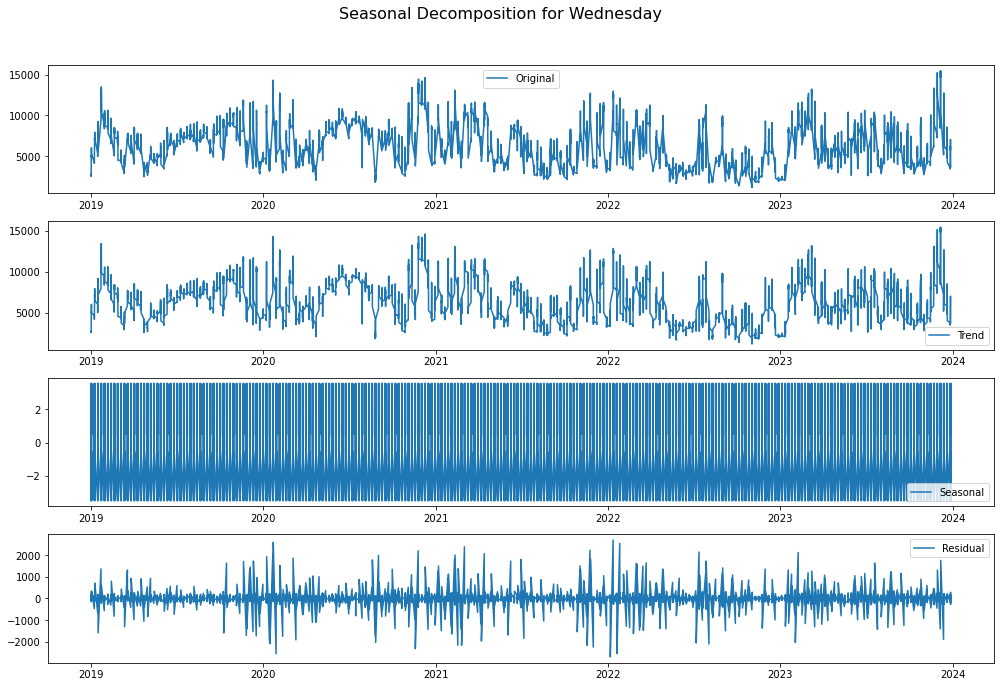

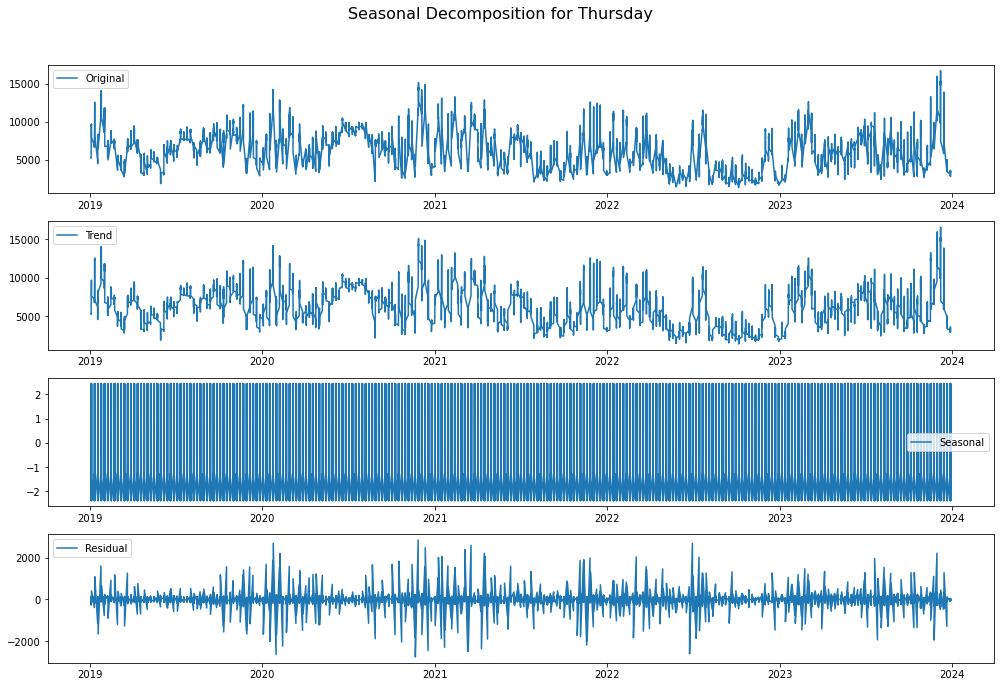

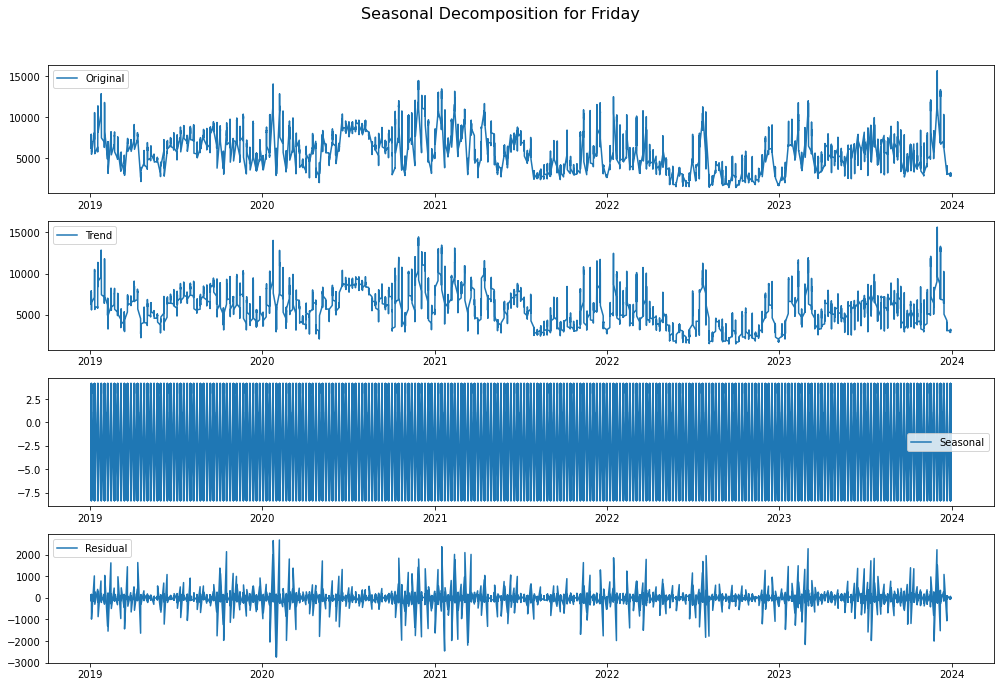

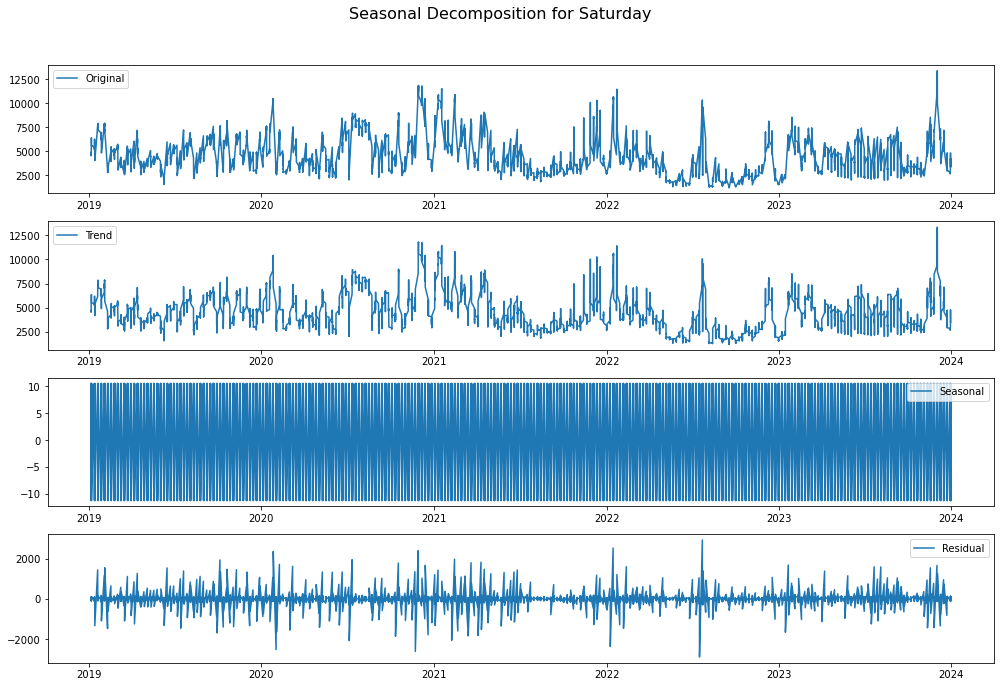

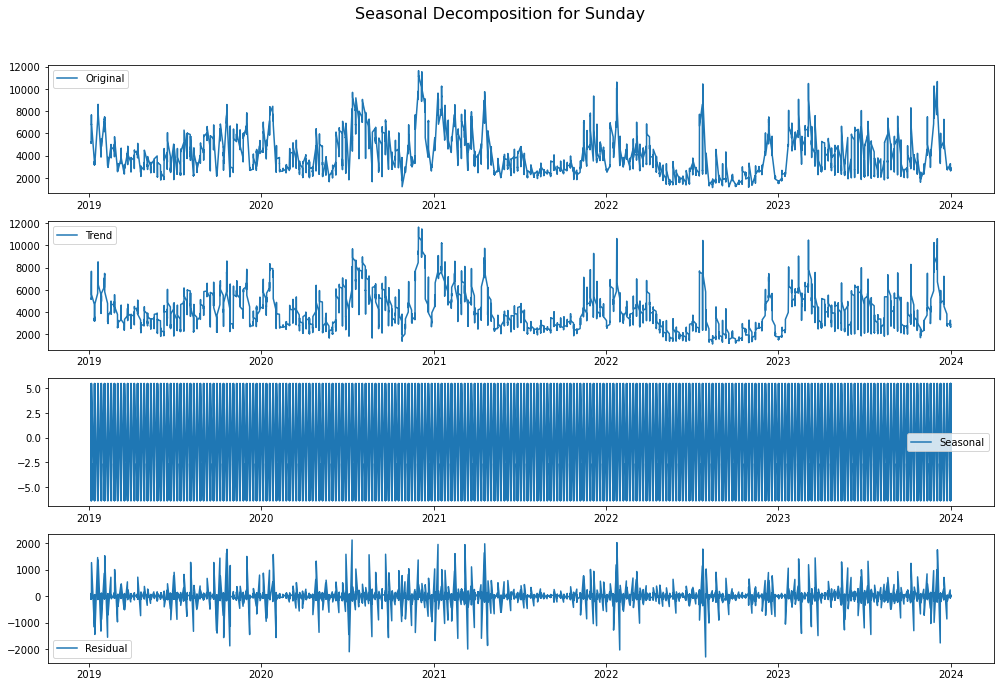

In [26]:
# Credits: ChatGPT
# Seasonal decoposition of Day of the week

# Add a new column for the day of the week (0=Monday, 6=Sunday)
df_fossil_gas['day_of_week'] = df_fossil_gas.index.dayofweek

# Dictionary to map day numbers to names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Loop through each day of the week
for day_num in range(7):
    # Filter data for the current day of the week
    df_day_of_week = df_fossil_gas[df_fossil_gas['day_of_week'] == day_num]
    
    # Check if the filtered DataFrame is empty
    if df_day_of_week.empty:
        print(f"No data available for {day_names[day_num]}.")
        continue
    
    # Perform seasonal decomposition
    try:
        decomposition = sm.tsa.seasonal_decompose(df_day_of_week['Fossil Gas  - Actual Aggregated [MW]'], model='additive', period=4)
    except ValueError as e:
        print(f"Could not decompose data for {day_names[day_num]}: {e}")
        continue
    
    # Add the decomposed components to the DataFrame
    df_day_of_week['trend'] = decomposition.trend
    df_day_of_week['seasonal'] = decomposition.seasonal
    df_day_of_week['residual'] = decomposition.resid
    
    # Plot the decomposed components
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'Seasonal Decomposition for {day_names[day_num]}', fontsize=16)
    
    plt.subplot(411)
    plt.plot(df_day_of_week['Fossil Gas  - Actual Aggregated [MW]'], label='Original')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.plot(df_day_of_week['trend'], label='Trend')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(df_day_of_week['seasonal'], label='Seasonal')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(df_day_of_week['residual'], label='Residual')
    plt.legend(loc='best')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

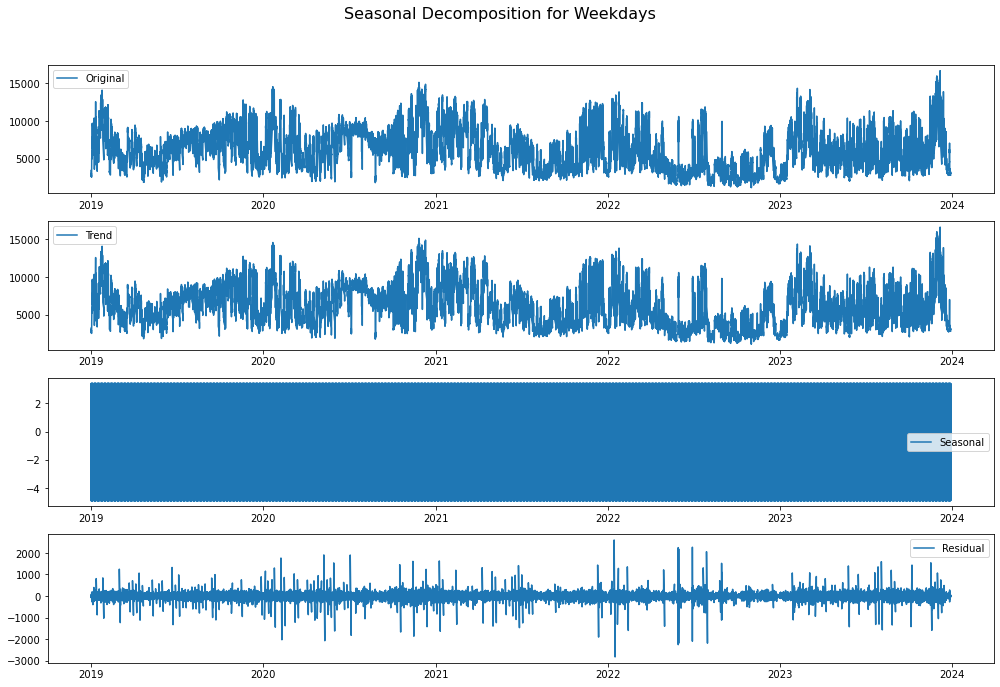

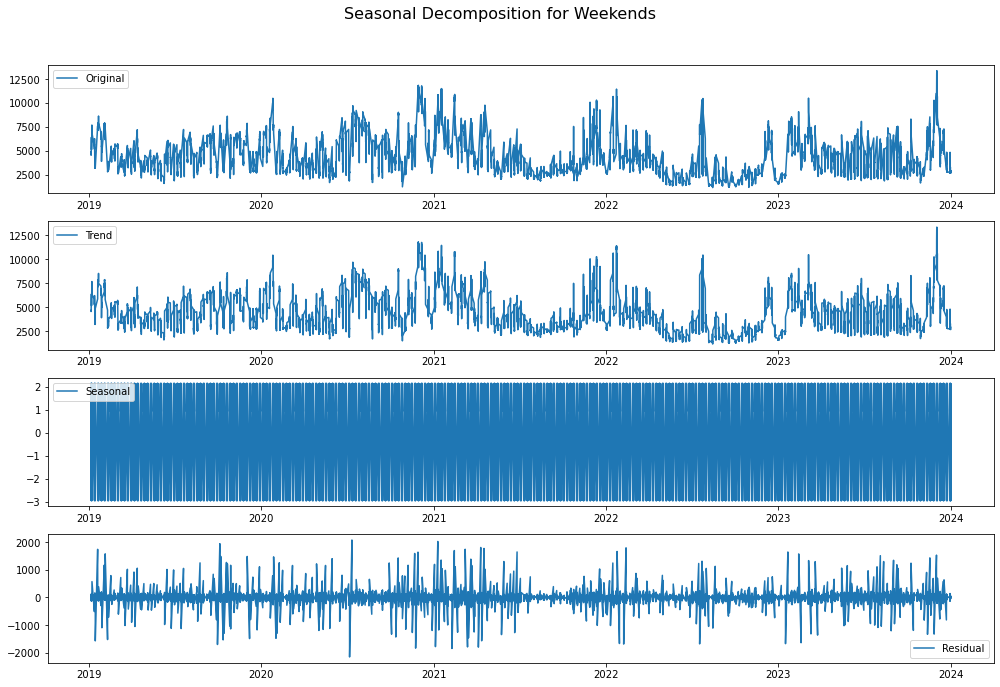

In [27]:
# Seasonal decoposition of Weekdays and Weekends
# Credits: ChatGPT

# Add a new column for the day of the week (0=Monday, 6=Sunday)
df_fossil_gas['day_of_week'] = df_fossil_gas.index.dayofweek

# Define a function to perform seasonal decomposition for a given DataFrame and day name
def decompose_and_plot(df, day_name):
    try:
        decomposition = sm.tsa.seasonal_decompose(df['Fossil Gas  - Actual Aggregated [MW]'], model='additive', period=4)
    except ValueError as e:
        print(f"Could not decompose data for {day_name}: {e}")
        return
    
    # Add the decomposed components to the DataFrame
    df['trend'] = decomposition.trend
    df['seasonal'] = decomposition.seasonal
    df['residual'] = decomposition.resid
    
    # Plot the decomposed components
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'Seasonal Decomposition for {day_name}', fontsize=16)
    
    plt.subplot(411)
    plt.plot(df['Fossil Gas  - Actual Aggregated [MW]'], label='Original')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.plot(df['trend'], label='Trend')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(df['seasonal'], label='Seasonal')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(df['residual'], label='Residual')
    plt.legend(loc='best')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Separate weekdays and weekends
weekdays = df_fossil_gas[df_fossil_gas['day_of_week'] < 5]  # Monday to Friday
weekends = df_fossil_gas[df_fossil_gas['day_of_week'] >= 5]  # Saturday and Sunday

# Perform seasonal decomposition for weekdays and weekends
decompose_and_plot(weekdays, 'Weekdays')
decompose_and_plot(weekends, 'Weekends')

<Figure size 1008x504 with 0 Axes>

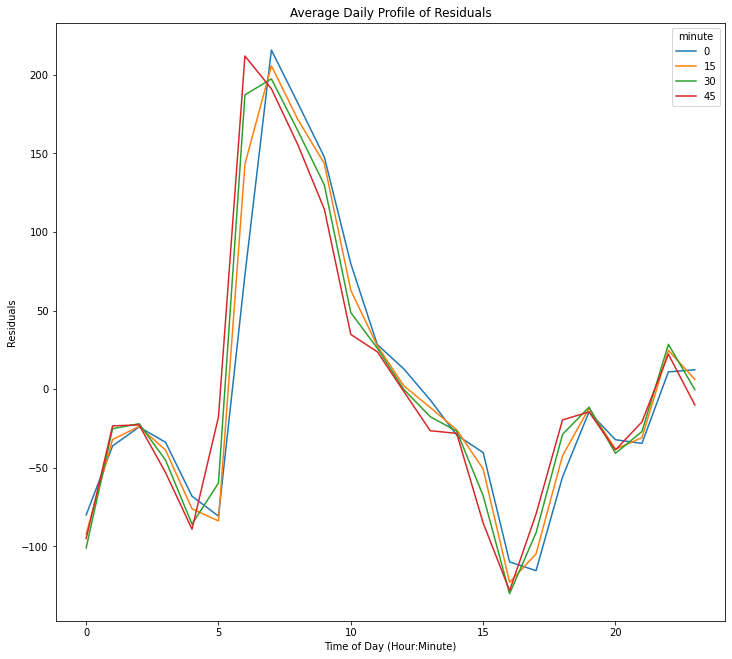

In [28]:
# Extract daily profiles of the residual component
df_fossil_gas['hour'] = df_fossil_gas.index.hour
df_fossil_gas['minute'] = df_fossil_gas.index.minute

# Group by hour and minute to get the average profile
daily_profile = df_fossil_gas.groupby(['hour', 'minute'])['residual'].mean().unstack()

# Plotting the average daily profile with 15-minute intervals
plt.figure(figsize=(14, 7))
daily_profile.plot(title='Average Daily Profile of Residuals', xlabel='Time of Day (Hour:Minute)', ylabel='Residuals')
plt.show()


In [29]:
# Check Stationarity of Residuals:

from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    dftest = adfuller(timeseries.dropna())
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

check_stationarity(df_fossil_gas['residual'])


The series is stationary


In [30]:
# Evaluate the Quality of the Fit
#Credits: ChatGPT
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(df_fossil_gas['residual'].dropna(), lags=10)

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")

Autocorrelation detected in residuals.


In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example model setup, you might need to optimize these parameters
sarima_model = SARIMAX(df_fossil_gas['Fossil Gas  - Actual Aggregated [MW]'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 96),  # assuming daily seasonality for 15-min data
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

# Plot the diagnostics to check for any unusual behavior
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Examine the residuals
residuals = sarima_results.resid
check_stationarity(residuals)


# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(residuals.dropna(), lags=10)

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")

MemoryError: Unable to allocate 49.7 GiB for an array with shape (195, 195, 175292) and data type float64

We tried with sarimax to see the results, but above error is coming.

# Task 4: Model selection

### Calculate residuals from decomposed model with trend, seasonal and daily components

In [31]:
df_fos['resid']= tsa_decomposed.resid
df_fos['trend']= tsa_decomposed.trend
df_fos['seasonal']= tsa_decomposed.seasonal
#df['trend_seasonal']= tsa_decomposed.trend*tsa_decomposed.seasonal

df_fos['observed']= tsa_decomposed.observed
# Note: Daily composition has been done in task 3.

In [32]:
df_fos

Fossil gas generation  resid  trend     seasonal  \
Date                                                                    
2019-01-01 00:00:00                 3410.0    NaN    NaN -2513.310074   
2019-01-01 00:15:00                 3295.0    NaN    NaN -2520.275399   
2019-01-01 00:30:00                 3228.0    NaN    NaN -2539.490892   
2019-01-01 00:45:00                 3194.0    NaN    NaN -2559.456674   
2019-01-01 01:00:00                 3071.0    NaN    NaN -2593.173975   
...                                    ...    ...    ...          ...   
2023-12-31 22:45:00                 2636.0    NaN    NaN -1726.291937   
2023-12-31 23:00:00                 2676.0    NaN    NaN -1757.753895   
2023-12-31 23:15:00                 2708.0    NaN    NaN -1769.466081   
2023-12-31 23:30:00                 2733.0    NaN    NaN -1798.428756   
2023-12-31 23:45:00                 2717.0    NaN    NaN -1847.641876   

                     observed  
Date                           
2019-01-01 00:00:00    3410.0  
2019-01-01 00:15:00    3295.0  
2019-01-01 00:30:00    3228.0  
2019-01-01 00:45:00    3194.0  
2019-01-01 01:00:00    3071.0  
...                       ...  
2023-12-31 22:45:00    2636.0  
2023-12-31 23:00:00    2676.0  
2023-12-31 23:15:00    2708.0  
2023-12-31 23:30:00    2733.0  
2023-12-31 23:45:00    2717.0  

[175292 rows x 5 columns]

In [33]:
df=df_fos.dropna().copy()

### Are your residuals stationary?

In [34]:
#Credits: Prof. Dr. Lämmle for teaching stationary, used the code taught in lecture.
check_stationarity(df['resid'])

The series is stationary


### Task 2 Part: Evaluate the quality of your fit using appropriate statistical indicators and/or visualizations

In [35]:
#Credits: ChatGPT
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(df['resid'], lags=10)  # Test autocorrelation up to lag 10

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")


Autocorrelation detected in residuals.


#### Comment: Quality of fit is not good as the residuals are autocorrelated.

#### We can also seasonal decompose residuals further as they are autocorrelated

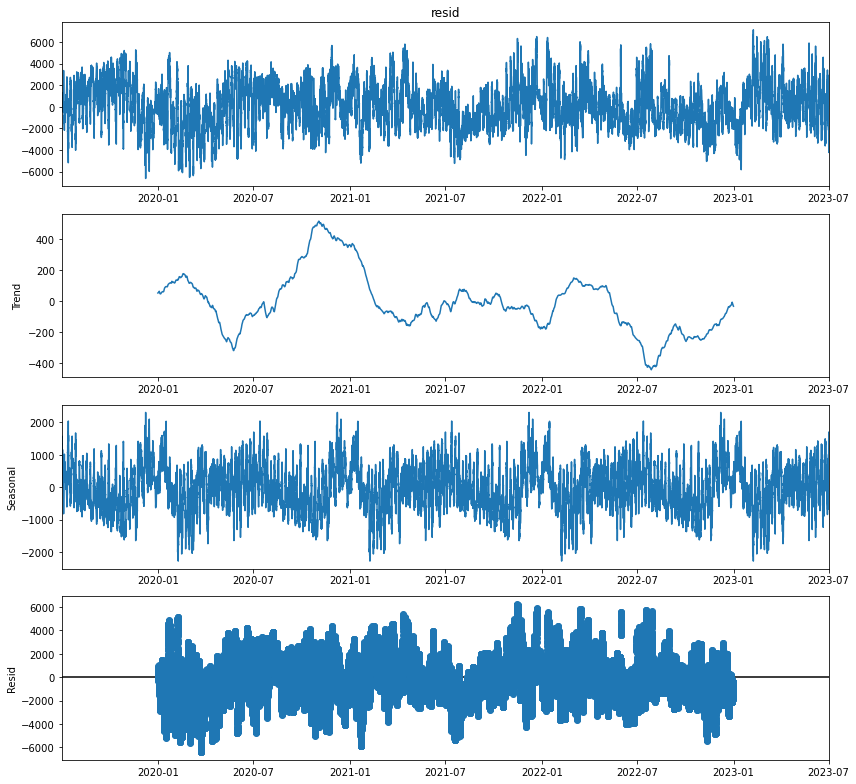

In [36]:
#Credits: Prof. Dr. Lämmle
tsa_decomposed = sm.tsa.seasonal_decompose(df['resid'],  period = 365*24*4, model='additive') 
#additive because Seasonal grow is almost varying around 6000

plt.rcParams['figure.figsize'] = 12, 11
fig = tsa_decomposed.plot()
plt.show()

In [37]:
df['resid2']= tsa_decomposed.resid
df['trend2']= tsa_decomposed.trend
df['seasonal2']= tsa_decomposed.seasonal
#df['trend_seasonal']= tsa_decomposed.trend*tsa_decomposed.seasonal

df['observed2']= tsa_decomposed.observed
# Note: Daily composition has been done in task 3.

In [38]:
df

Fossil gas generation        resid        trend  \
Date                                                                   
2019-07-02 13:00:00                 7120.0   322.446702  6262.861515   
2019-07-02 13:15:00                 7053.0   246.195982  6262.909132   
2019-07-02 13:30:00                 7089.0   351.546291  6262.956193   
2019-07-02 13:45:00                 6947.0   331.697889  6263.002297   
2019-07-02 14:00:00                 6856.0   257.651533  6263.046789   
...                                    ...          ...          ...   
2023-07-02 11:45:00                 2077.0 -3643.329600  5733.254167   
2023-07-02 12:00:00                 2100.0 -3617.361723  5733.285245   
2023-07-02 12:15:00                 2145.0 -3556.794406  5733.317195   
2023-07-02 12:30:00                 2205.0 -3545.827242  5733.349443   
2023-07-02 12:45:00                 2216.0 -3545.260307  5733.381921   

                       seasonal  observed  resid2  trend2    seasonal2  \
Date                                                                     
2019-07-02 13:00:00  534.691783    7120.0     NaN     NaN  1553.133694   
2019-07-02 13:15:00  543.894885    7053.0     NaN     NaN  1574.644725   
2019-07-02 13:30:00  474.497516    7089.0     NaN     NaN  1518.087503   
2019-07-02 13:45:00  352.299814    6947.0     NaN     NaN  1490.662302   
2019-07-02 14:00:00  335.301677    6856.0     NaN     NaN  1438.701859   
...                         ...       ...     ...     ...          ...   
2023-07-02 11:45:00  -12.924567    2077.0     NaN     NaN  1142.644015   
2023-07-02 12:00:00  -15.923522    2100.0     NaN     NaN  1124.028945   
2023-07-02 12:15:00  -31.522789    2145.0     NaN     NaN  1106.346663   
2023-07-02 12:30:00   17.477799    2205.0     NaN     NaN  1122.064003   
2023-07-02 12:45:00   27.878387    2216.0     NaN     NaN  1140.381589   

                       observed2  
Date                              
2019-07-02 13:00:00   322.446702  
2019-07-02 13:15:00   246.195982  
2019-07-02 13:30:00   351.546291  
2019-07-02 13:45:00   331.697889  
2019-07-02 14:00:00   257.651533  
...                          ...  
2023-07-02 11:45:00 -3643.329600  
2023-07-02 12:00:00 -3617.361723  
2023-07-02 12:15:00 -3556.794406  
2023-07-02 12:30:00 -3545.827242  
2023-07-02 12:45:00 -3545.260307  

[140252 rows x 9 columns]

In [39]:
df2=df.dropna().copy()

In [40]:
#Credits: ChatGPT
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(df2['resid2'], lags=10)  # Test autocorrelation up to lag 10

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")


Autocorrelation detected in residuals.


#### Comment: Residuals of residuals are still autocorrelated. So, we have to do ARIMA model fit and see the results.

## Plot the autocorrelation and partial auto correlation function for your residuals

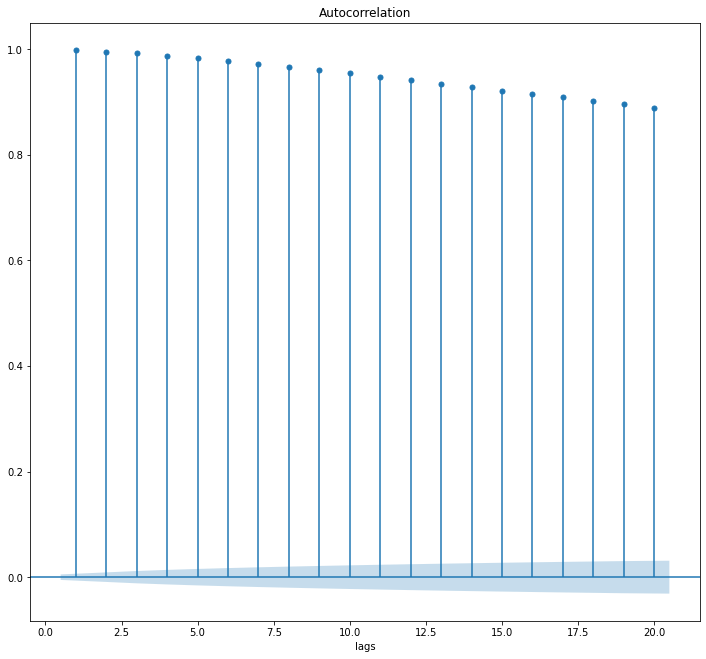

In [41]:
#Credits: Prof. Dr. Lämmle for teaching autocorrelation and correlation, used the code taught in lecture.
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

# plot autocorrelation function
plot_acf(df['resid'], alpha = 0.05, lags=20, zero=False)
plt.xlabel('lags')
plt.show()

#### Comment: We can see that residuals are positively Autocorrelated. So, the model is underfitting the data.

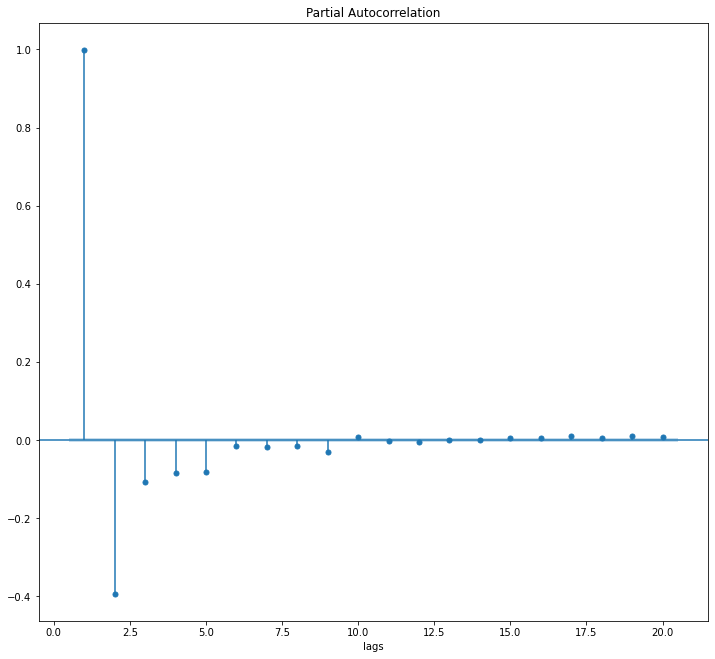

In [42]:
# plot partial autocorrelation function
plot_pacf(df['resid'], alpha = 0.05, lags = 20, zero=False)
plt.xlabel('lags');

Text(0.5, 1.0, 'lag plot for Residuals')

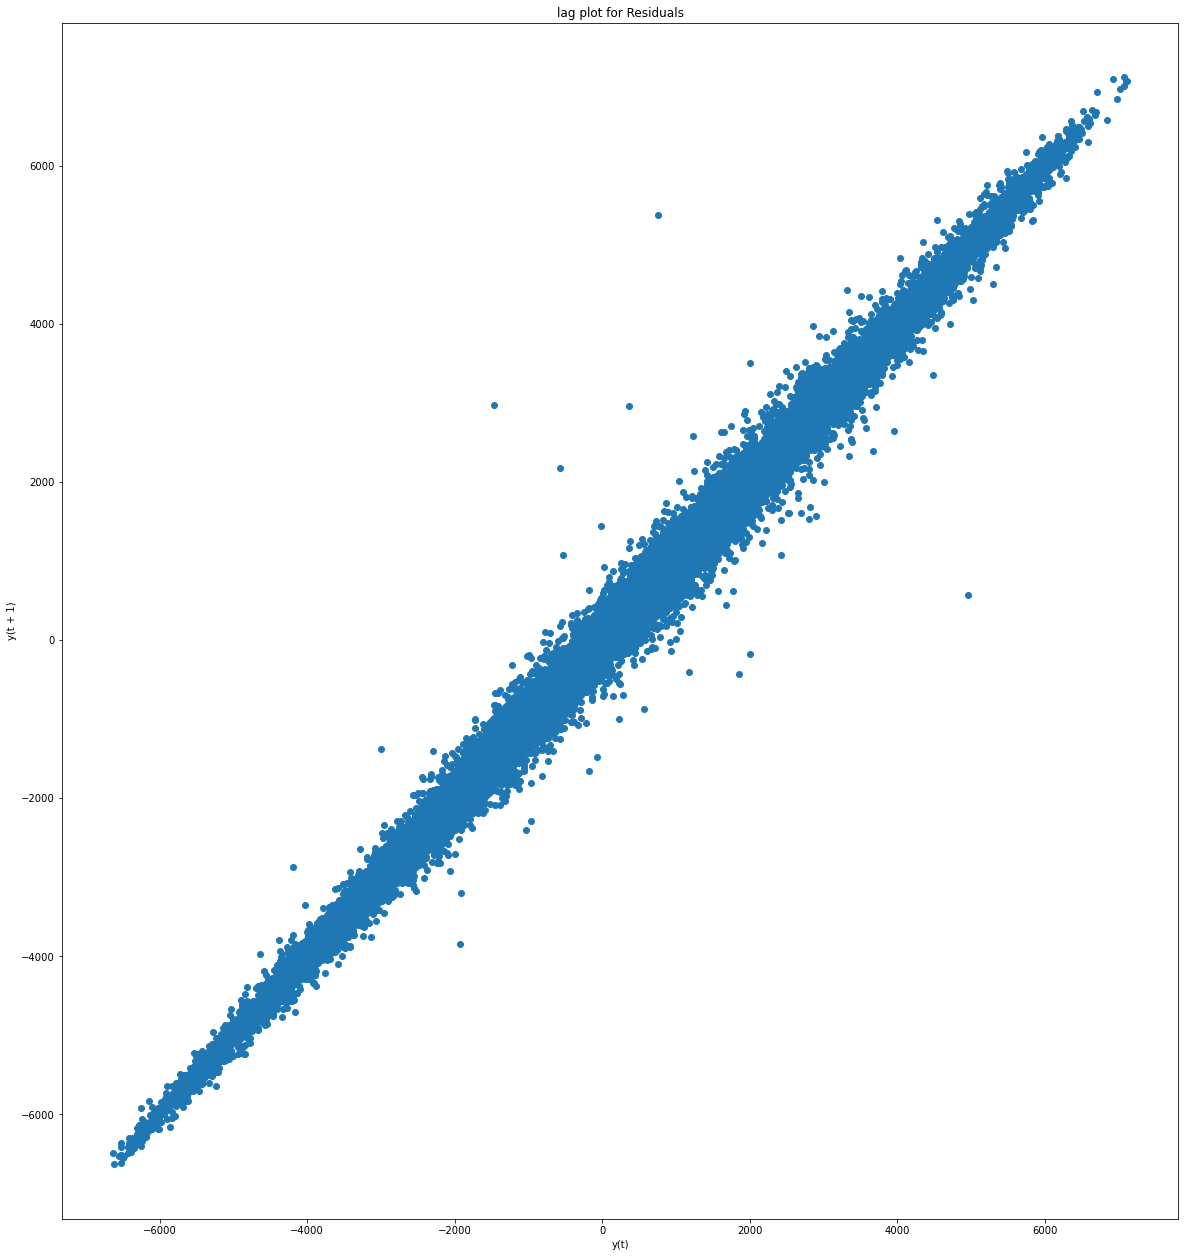

In [43]:
from pandas.plotting import lag_plot


fig, axes = plt.subplots(figsize=(20,22))

lag_plot(df['resid'], lag=1, ax=axes)
axes.set_title("lag plot for Residuals")

## Compare at least 5 different ARIMA models and select the best model

In [44]:
#Credits: Prof. Dr. Lämmle for teaching grid search 
import itertools

p = q = range(0, 3)
d = range(0,3)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [45]:
# Import ARIMA module from statsmodels.tsa
from statsmodels.tsa.arima.model import ARIMA

In [46]:
labels = []
aic = []
bic = []

for param in pdq:
        try:
            model = ARIMA(df['resid'], order=param)
            results = model.fit()  

            print('ARIMA{} - AIC:{} - BIC:{}'.format(param, results.aic, results.bic))
            labels.append(str(param))
            aic.append(results.aic)
            bic.append(results.bic)
        except:
            continue
            


ARIMA(0, 0, 0) - AIC:4057321.3739678957 - BIC:4057341.0763600627
ARIMA(0, 0, 1) - AIC:2349217.7256879727 - BIC:2349247.2792762234
ARIMA(0, 0, 2) - AIC:2241742.556376526 - BIC:2241781.9611608605
ARIMA(0, 1, 0) - AIC:1728651.678679171 - BIC:1728661.5298681245
ARIMA(0, 1, 1) - AIC:1710528.122927338 - BIC:1710547.825305245
ARIMA(0, 1, 2) - AIC:1706571.3553830404 - BIC:1706600.908949901
ARIMA(0, 2, 0) - AIC:1755946.5859929924 - BIC:1755956.4371748157
ARIMA(0, 2, 1) - AIC:1713441.5990315804 - BIC:1713461.3013952272
ARIMA(0, 2, 2) - AIC:1708625.2071455952 - BIC:1708654.7606910653
ARIMA(1, 0, 0) - AIC:1728562.925838967 - BIC:1728592.4794272177
ARIMA(1, 0, 1) - AIC:1710381.058598183 - BIC:1710420.4633825172
ARIMA(1, 0, 2) - AIC:1706379.8966521614 - BIC:1706429.152632579
ARIMA(1, 1, 0) - AIC:1705185.9236254618 - BIC:1705205.6260033688
ARIMA(1, 1, 1) - AIC:1702657.445972736 - BIC:1702686.9995395965
ARIMA(1, 1, 2) - AIC:1701996.731339831 - BIC:1702036.136095645
ARIMA(1, 2, 0) - AIC:1734568.6615641

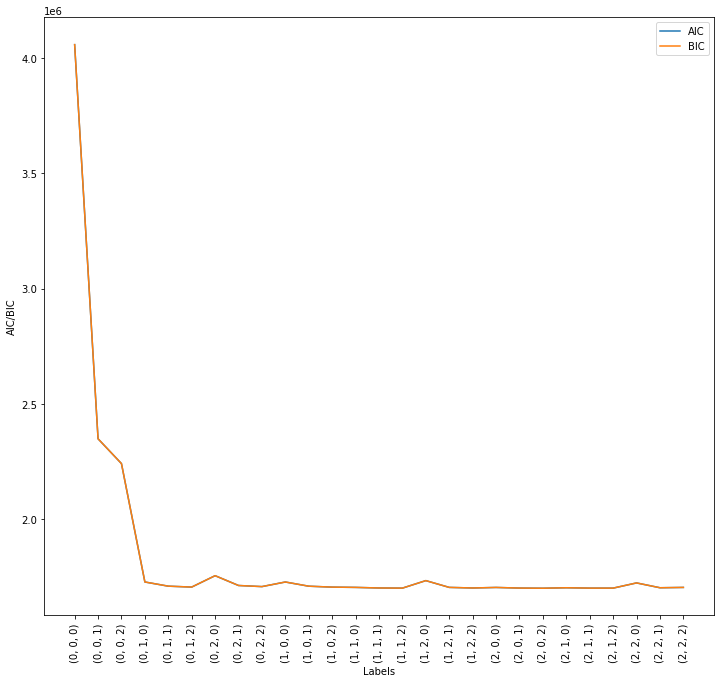

In [47]:
plt.plot(labels, aic, label='AIC')
plt.plot(labels, bic, label='BIC')
plt.xlabel('Labels')
plt.xticks(rotation=90)
plt.ylabel('AIC/BIC')
plt.legend()
plt.show()

### Comment: These four ARIMA models are the best models because they have low BIC:

#### ARIMA(1, 1, 2) - AIC:1701996.731339831 - BIC:1702036.136095645
#### ARIMA(1, 2, 2) - AIC:1702660.519760219 - BIC:1702699.9244875126
#### ARIMA(2, 1, 1) - AIC:1702033.4617522028 - BIC:1702072.8665080168
#### ARIMA(2, 1, 2) - AIC:1701998.3183358228 - BIC:1702047.5742805903
#### ARIMA(2, 0, 2) - AIC:1701520.0662005027 - BIC:1701579.173377004

In [48]:
#  - Select order of optimum Model
order=(1,1,2)


#  - Instantiate ARIMA model
model = ARIMA(df['resid'], order=order)


#  - Fit model and store as results
results = model.fit()


#  - Create summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:               140252
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -850994.366
Date:                Mon, 27 May 2024   AIC                        1701996.731
Time:                        22:47:02   BIC                        1702036.136
Sample:                             0   HQIC                       1702008.511
                             - 140252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8129      0.004    228.831      0.000       0.806       0.820
ma.L1         -0.4779      0.004   -130.032      0.000      -0.485      -0.471
ma.L2         -0.0909      0.003    -34.329      0.000      -0.096      -0.086
sigma2      1.092e+04      6.099   1790.667      0.000    1.09e+04    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          48803506.79
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
#  - Select order of optimum Model
order=(1,2,2)


#  - Instantiate ARIMA model
model = ARIMA(df['resid'], order=order)


#  - Fit model and store as results
results = model.fit()


#  - Create summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:               140252
Model:                 ARIMA(1, 2, 2)   Log Likelihood             -851326.260
Date:                Mon, 27 May 2024   AIC                        1702660.520
Time:                        22:48:11   BIC                        1702699.924
Sample:                             0   HQIC                       1702672.299
                             - 140252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7140      0.003    272.740      0.000       0.709       0.719
ma.L1         -1.3981      0.003   -481.415      0.000      -1.404      -1.392
ma.L2          0.3981      0.003    138.701      0.000       0.392       0.404
sigma2      1.096e+04      6.350   1726.095      0.000    1.09e+04     1.1e+04
===================================================================================
Ljung-Box (L1) (Q):                  55.90   Jarque-Bera (JB):          47577349.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#  - Select order of optimum Model
order=(2,1,1)


#  - Instantiate ARIMA model
model = ARIMA(df['resid'], order=order)


#  - Fit model and store as results
results = model.fit()


#  - Create summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:               140252
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -851012.731
Date:                Mon, 27 May 2024   AIC                        1702033.462
Time:                        22:48:43   BIC                        1702072.867
Sample:                             0   HQIC                       1702045.241
                             - 140252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9943      0.008    117.577      0.000       0.978       1.011
ar.L2         -0.1407      0.004    -33.684      0.000      -0.149      -0.132
ma.L1         -0.6608      0.008    -78.795      0.000      -0.677      -0.644
sigma2      1.091e+04      6.094   1790.781      0.000    1.09e+04    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):          48765650.75
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
#  - Select order of optimum Model
order=(2,1,2)


#  - Instantiate ARIMA model
model = ARIMA(df['resid'], order=order)


#  - Fit model and store as results
results = model.fit()


#  - Create summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:               140252
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -850994.159
Date:                Mon, 27 May 2024   AIC                        1701998.318
Time:                        22:49:16   BIC                        1702047.574
Sample:                             0   HQIC                       1702013.043
                             - 140252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8303      0.028     29.823      0.000       0.776       0.885
ar.L2         -0.0130      0.020     -0.653      0.513      -0.052       0.026
ma.L1         -0.4951      0.028    -17.788      0.000      -0.550      -0.441
ma.L2         -0.0833      0.012     -7.175      0.000      -0.106      -0.061
sigma2      1.092e+04      6.123   1783.467      0.000    1.09e+04    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          48813571.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
#  - Select order of optimum Model
order=(2,0,2)


#  - Instantiate ARIMA model
model = ARIMA(df['resid'], order=order)


#  - Fit model and store as results
results = model.fit()


#  - Create summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:               140252
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -850754.033
Date:                Mon, 27 May 2024   AIC                        1701520.066
Time:                        22:49:57   BIC                        1701579.173
Sample:                             0   HQIC                       1701537.735
                             - 140252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.1035     98.580      0.559      0.576    -138.111     248.318
ar.L1          1.8259      0.003    537.086      0.000       1.819       1.833
ar.L2         -0.8270      0.003   -243.988      0.000      -0.834      -0.820
ma.L1         -0.4948      0.004   -139.923      0.000      -0.502      -0.488
ma.L2         -0.0974      0.003    -37.218      0.000      -0.103      -0.092
sigma2      1.088e+04      6.217   1749.695      0.000    1.09e+04    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):          49002695.81
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Comment: Order 2,0,2 is the best model as AIC and BIC are the lowest.

### ARIMA model to be considered here as (2,0,2) for predicting residuals.

In [53]:
df['residuals_pred']=results.fittedvalues

<AxesSubplot:xlabel='Date'>

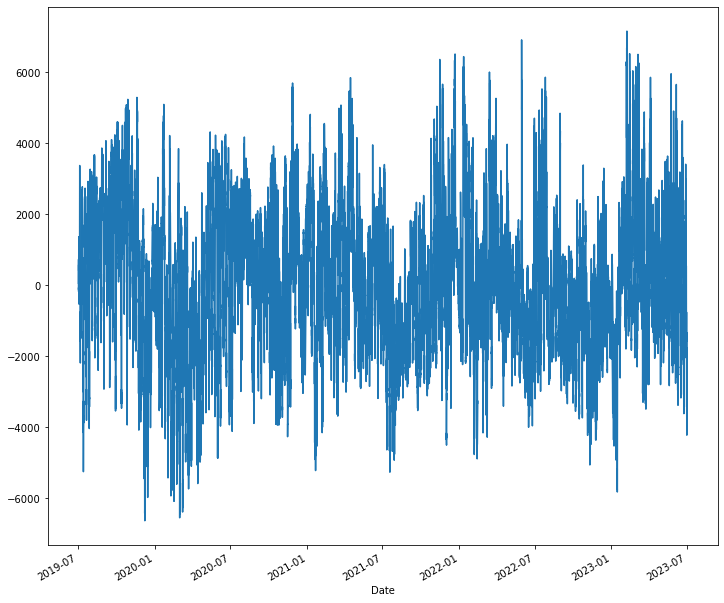

In [54]:
df['residuals_pred'].plot()

#### Perform LjungBox test to see whether predicted residuals are autocorrelated or not.

In [55]:
#Credits: ChatGPT

# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(df['residuals_pred'], lags=10)  # Test autocorrelation up to lag 10

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")

Autocorrelation detected in residuals.


In [56]:
p_value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Comment: Autocorrelation is still there in residuals after fitting in ARIMA model too. Hence, the quality of model is not good.

# Task 5: Model deployment

### Deploy a rolling forecast on the last year of your training data
#### ► Visualize your forecast including uncertainty ranges
#### ► Evaluate the quality of your forecast

In [57]:
df_train = df[:'2022-12-31']  #we should know why !!
df_test = df['2023-01-01':]

In [58]:
df_train

Fossil gas generation        resid        trend  \
Date                                                                   
2019-07-02 13:00:00                 7120.0   322.446702  6262.861515   
2019-07-02 13:15:00                 7053.0   246.195982  6262.909132   
2019-07-02 13:30:00                 7089.0   351.546291  6262.956193   
2019-07-02 13:45:00                 6947.0   331.697889  6263.002297   
2019-07-02 14:00:00                 6856.0   257.651533  6263.046789   
...                                    ...          ...          ...   
2022-12-31 22:45:00                 1580.0 -1297.956297  4725.598174   
2022-12-31 23:00:00                 1546.0 -1232.238917  4725.594364   
2022-12-31 23:15:00                 1553.0 -1178.520420  4725.590168   
2022-12-31 23:30:00                 1570.0 -1065.300675  4725.585417   
2022-12-31 23:45:00                 1546.0 -1013.830348  4725.580265   

                        seasonal  observed       resid2     trend2  \
Date                                                                 
2019-07-02 13:00:00   534.691783    7120.0          NaN        NaN   
2019-07-02 13:15:00   543.894885    7053.0          NaN        NaN   
2019-07-02 13:30:00   474.497516    7089.0          NaN        NaN   
2019-07-02 13:45:00   352.299814    6947.0          NaN        NaN   
2019-07-02 14:00:00   335.301677    6856.0          NaN        NaN   
...                          ...       ...          ...        ...   
2022-12-31 22:45:00 -1847.641876    1580.0 -1373.619763 -30.703798   
2022-12-31 23:00:00 -1947.355447    1546.0          NaN        NaN   
2022-12-31 23:15:00 -1994.069748    1553.0          NaN        NaN   
2022-12-31 23:30:00 -2090.284742    1570.0          NaN        NaN   
2022-12-31 23:45:00 -2165.749917    1546.0          NaN        NaN   

                       seasonal2    observed2  residuals_pred  
Date                                                           
2019-07-02 13:00:00  1553.133694   322.446702       55.103459  
2019-07-02 13:15:00  1574.644725   246.195982      322.050538  
2019-07-02 13:30:00  1518.087503   351.546291      215.826057  
2019-07-02 13:45:00  1490.662302   331.697889      379.685792  
2019-07-02 14:00:00  1438.701859   257.651533      325.405221  
...                          ...          ...             ...  
2022-12-31 22:45:00   106.367265 -1297.956297    -1309.237467  
2022-12-31 23:00:00   507.017673 -1232.238917    -1273.849657  
2022-12-31 23:15:00   489.139685 -1178.520420    -1198.052722  
2022-12-31 23:30:00   451.426839 -1065.300675    -1146.352837  
2022-12-31 23:45:00   434.296755 -1013.830348    -1012.343346  

[122736 rows x 10 columns]

In [59]:
df_test

Fossil gas generation        resid        trend  \
Date                                                                   
2023-01-01 00:00:00                 1720.0  -727.860653  4725.575870   
2023-01-01 00:15:00                 1719.0  -776.891250  4725.571904   
2023-01-01 00:30:00                 1729.0  -770.171355  4725.567694   
2023-01-01 00:45:00                 1723.0  -770.951374  4725.564041   
2023-01-01 01:00:00                 1565.0  -830.981700  4725.560773   
...                                    ...          ...          ...   
2023-07-02 11:45:00                 2077.0 -3643.329600  5733.254167   
2023-07-02 12:00:00                 2100.0 -3617.361723  5733.285245   
2023-07-02 12:15:00                 2145.0 -3556.794406  5733.317195   
2023-07-02 12:30:00                 2205.0 -3545.827242  5733.349443   
2023-07-02 12:45:00                 2216.0 -3545.260307  5733.381921   

                        seasonal  observed  resid2  trend2    seasonal2  \
Date                                                                      
2023-01-01 00:00:00 -2277.715218    1720.0     NaN     NaN   339.000300   
2023-01-01 00:15:00 -2229.680654    1719.0     NaN     NaN   355.370570   
2023-01-01 00:30:00 -2226.396339    1729.0     NaN     NaN   353.156928   
2023-01-01 00:45:00 -2231.612667    1723.0     NaN     NaN   353.442587   
2023-01-01 01:00:00 -2329.579073    1565.0     NaN     NaN   373.478370   
...                          ...       ...     ...     ...          ...   
2023-07-02 11:45:00   -12.924567    2077.0     NaN     NaN  1142.644015   
2023-07-02 12:00:00   -15.923522    2100.0     NaN     NaN  1124.028945   
2023-07-02 12:15:00   -31.522789    2145.0     NaN     NaN  1106.346663   
2023-07-02 12:30:00    17.477799    2205.0     NaN     NaN  1122.064003   
2023-07-02 12:45:00    27.878387    2216.0     NaN     NaN  1140.381589   

                       observed2  residuals_pred  
Date                                              
2023-01-01 00:00:00  -727.860653     -977.160147  
2023-01-01 00:15:00  -776.891250     -613.624871  
2023-01-01 00:30:00  -770.171355     -759.970323  
2023-01-01 00:45:00  -770.951374     -742.684409  
2023-01-01 01:00:00  -830.981700     -755.640994  
...                          ...             ...  
2023-07-02 11:45:00 -3643.329600    -3612.347353  
2023-07-02 12:00:00 -3617.361723    -3640.869390  
2023-07-02 12:15:00 -3556.794406    -3600.156076  
2023-07-02 12:30:00 -3545.827242    -3526.177117  
2023-07-02 12:45:00 -3545.260307    -3527.003096  

[17516 rows x 10 columns]

In [60]:
df_train = df_train[~df_train.index.duplicated()]
df_test = df_test[~df_test.index.duplicated()]
df = df[~df.index.duplicated()]

In [61]:
# If we want to use the datetime index for forecasting, instead of steps/lags, we have to specify the frequency
# Since we use daily steps we set freq to 'd'
df_train = df_train.asfreq('d')
df_test = df_test.asfreq('d')
df = df.asfreq('d')

# Credits: Prof. Dr. Lämmle

In [62]:
model = ARIMA(df_train['resid'], order=(2,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                 1279
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -11351.153
Date:                Mon, 27 May 2024   AIC                          22714.306
Time:                        22:50:09   BIC                          22745.229
Sample:                    07-02-2019   HQIC                         22725.918
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9736    267.606      0.205      0.837    -469.525     579.472
ar.L1          1.0891      0.070     15.611      0.000       0.952       1.226
ar.L2         -0.1118      0.064     -1.747      0.081      -0.237       0.014
ma.L1         -0.5443      0.066     -8.187      0.000      -0.675      -0.414
ma.L2         -0.3358      0.048     -6.950      0.000      -0.431      -0.241
sigma2      3.108e+06      0.069   4.51e+07      0.000    3.11e+06    3.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.82
Prob(Q):                              0.97   Prob(JB):                         0.02
Heteroskedasticity (H):               0.83   Skew:                             0.18
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+23. Standard errors may be unstable.
"""

In [63]:
df_train['residuals_predicted']=results.fittedvalues

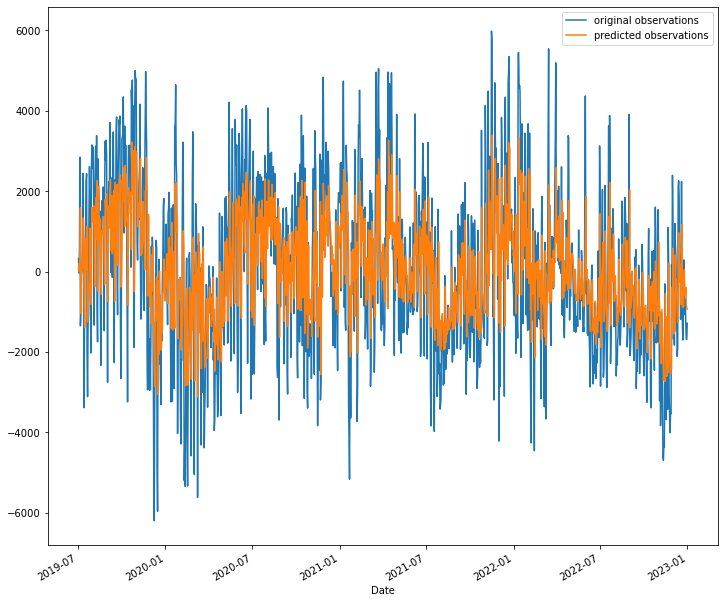

In [64]:
df_train['resid'].plot(label="original observations")
df_train['residuals_predicted'].plot(label="predicted observations")
plt.legend()

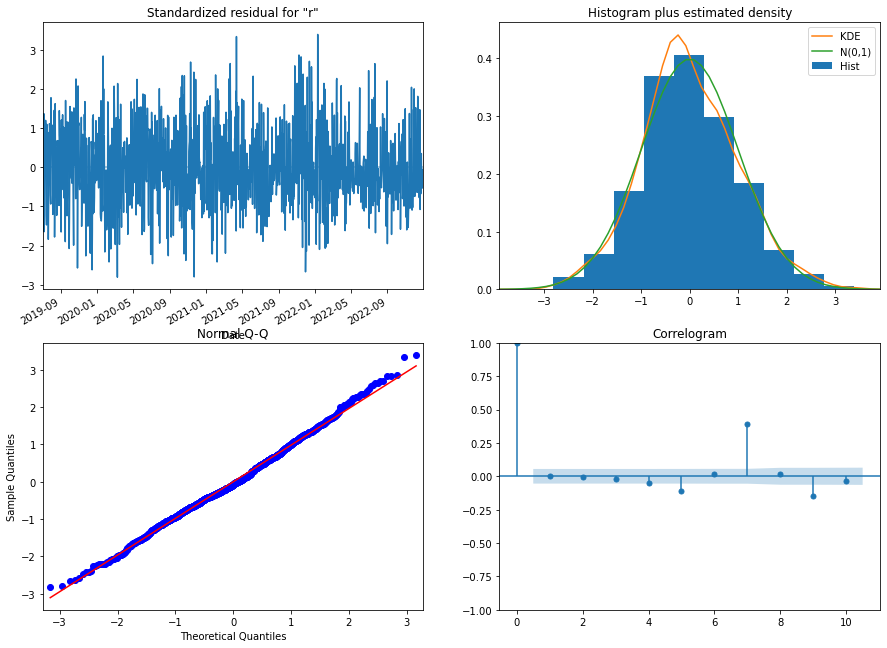

In [65]:
# Let's analyse the forecast
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [66]:
# Predict on axis of test dataframe

pred = results.get_prediction(start=df_test.index[0], end =df_test.index[-1], dynamic=False)
pred_ci = pred.conf_int()

In [67]:
#Store results in test dataframe

# Import the datetime module
import datetime

# Remove the time component from the index of pred.predicted_mean
pred_index_date_only = [index.date() for index in pred.predicted_mean.index]

df_test['residuals_predicted'] = pred.predicted_mean.values
df_test.index = pred_index_date_only

df_test['lower resid']=pred_ci['lower resid']
df_test['upper resid']=pred_ci['upper resid']
#Credits: ChatGPT

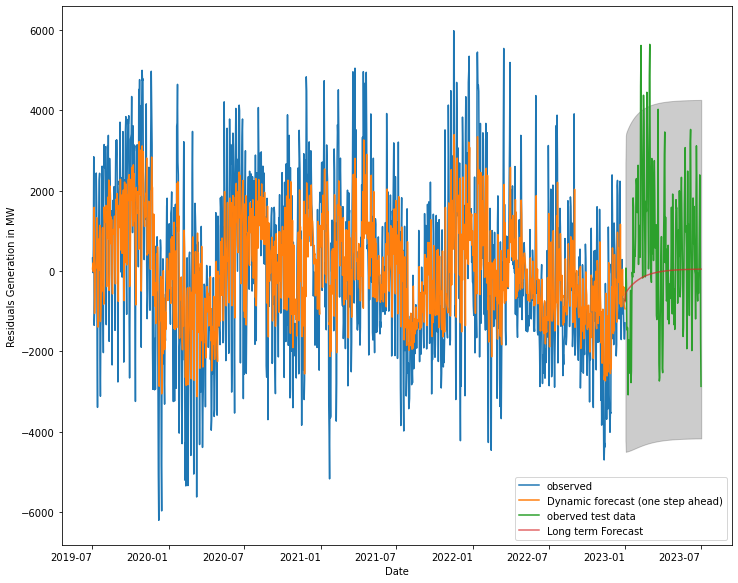

In [68]:
# Credits: Prof. Dr. Lämmle
ax = df_train['resid'].plot(label='observed')

df_train['residuals_predicted'].plot(label='Dynamic forecast (one step ahead)')
df_test['resid'].plot(label='oberved test data')
df_test['residuals_predicted'].plot(ax=ax, label='Long term Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Residuals Generation in MW')
#plt.xlim('2023-1','2023-12')
plt.legend()

plt.show()

### Evaluate the quality of your forecast

In [69]:
#Credits: ChatGPT
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
mse = mean_squared_error(df_train['resid'], df_train['residuals_predicted'])

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(rmse)

1729.4055506509646


#### Comment: The Rmse value is quite high, so the forecast is not so good.

### Create a synthetic profile for 2024. Deploy a statistical model for the residuals which closely imitates the time series regarding autocorrelation, moving average, variance, mean, ...
#### ► Visualize your synthetic profile

In [70]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [71]:
df

Fossil gas generation        resid        trend  \
Date                                                                   
2019-07-02 13:00:00                 7120.0   322.446702  6262.861515   
2019-07-03 13:00:00                 7041.0   -35.226021  6268.213499   
2019-07-04 13:00:00                 5922.0   559.027108  6270.919392   
2019-07-05 13:00:00                 6910.0  2846.322331  6260.758918   
2019-07-06 13:00:00                 2598.0 -1349.337882  6253.602426   
...                                    ...          ...          ...   
2023-06-27 13:00:00                 5311.0   773.897809  5711.133134   
2023-06-28 13:00:00                 6551.0  1777.110819  5719.278154   
2023-06-29 13:00:00                 7008.0   610.749482  5722.459803   
2023-06-30 13:00:00                 5277.0 -1231.665565  5725.421190   
2023-07-01 13:00:00                 2250.0 -4187.567021  5729.775342   

                        seasonal  observed  resid2  trend2    seasonal2  \
Date                                                                      
2019-07-02 13:00:00   534.691783    7120.0     NaN     NaN  1553.133694   
2019-07-03 13:00:00   808.012522    7041.0     NaN     NaN   305.800464   
2019-07-04 13:00:00  -907.946500    5922.0     NaN     NaN   109.717645   
2019-07-05 13:00:00 -2197.081249    6910.0     NaN     NaN  -652.238239   
2019-07-06 13:00:00 -2306.264543    2598.0     NaN     NaN   745.735984   
...                          ...       ...     ...     ...          ...   
2023-06-27 13:00:00 -1174.030943    5311.0     NaN     NaN    29.111395   
2023-06-28 13:00:00  -945.388973    6551.0     NaN     NaN  -303.002225   
2023-06-29 13:00:00   674.790715    7008.0     NaN     NaN    86.816914   
2023-06-30 13:00:00   783.244375    5277.0     NaN     NaN   701.947282   
2023-07-01 13:00:00   707.791678    2250.0     NaN     NaN  1688.490398   

                       observed2  residuals_pred  
Date                                              
2019-07-02 13:00:00   322.446702       55.103459  
2019-07-03 13:00:00   -35.226021      -95.272239  
2019-07-04 13:00:00   559.027108      519.829223  
2019-07-05 13:00:00  2846.322331     2767.889544  
2019-07-06 13:00:00 -1349.337882    -1338.738708  
...                          ...             ...  
2023-06-27 13:00:00   773.897809      843.992914  
2023-06-28 13:00:00  1777.110819     1626.581711  
2023-06-29 13:00:00   610.749482      475.894433  
2023-06-30 13:00:00 -1231.665565    -1294.255364  
2023-07-01 13:00:00 -4187.567021    -4215.333529  

[1461 rows x 10 columns]

In [72]:
# Fit an ARIMA model to the historical data
order = (2, 0, 2)
model = ARIMA(df['Fossil gas generation'], order=order)
fitted_model = model.fit()

In [73]:
# Get the AR and MA parameters from the fitted model
ar_params = fitted_model.arparams
ma_params = fitted_model.maparams

# Generate synthetic data for future time periods
synthetic_data = arma_generate_sample(ar=ar_params, ma=ma_params, nsample=366)

In [74]:
#Credits: ChatGPT
import datetime

# Define the start and end dates for the year 2024
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 12, 31)

dates_2024 = []

current_date = start_date
while current_date <= end_date:
    dates_2024.append(current_date)
    current_date += datetime.timedelta(days=1)

# Convert the list of dates to an array if needed
dates_2024_array = np.array(dates_2024)

In [75]:
synthetic_data_frame=pd.DataFrame()
synthetic_data_frame['Date']=dates_2024_array
synthetic_data_frame['Fossil gas generation']=synthetic_data

In [76]:
synthetic_data_frame.set_index('Date', inplace=True)

In [77]:
synthetic_data_frame

Fossil gas generation
Date                             
2024-01-01              -0.164850
2024-01-02               0.309478
2024-01-03               0.795103
2024-01-04               0.555184
2024-01-05               0.834087
...                           ...
2024-12-27               0.553563
2024-12-28               0.664506
2024-12-29               0.432443
2024-12-30              -0.699174
2024-12-31              -0.078854

[366 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

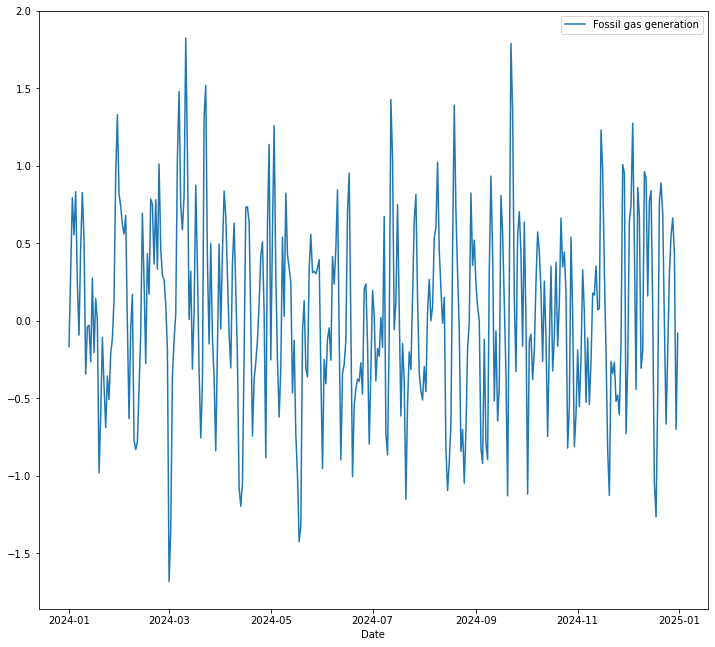

In [78]:
synthetic_data_frame.plot()

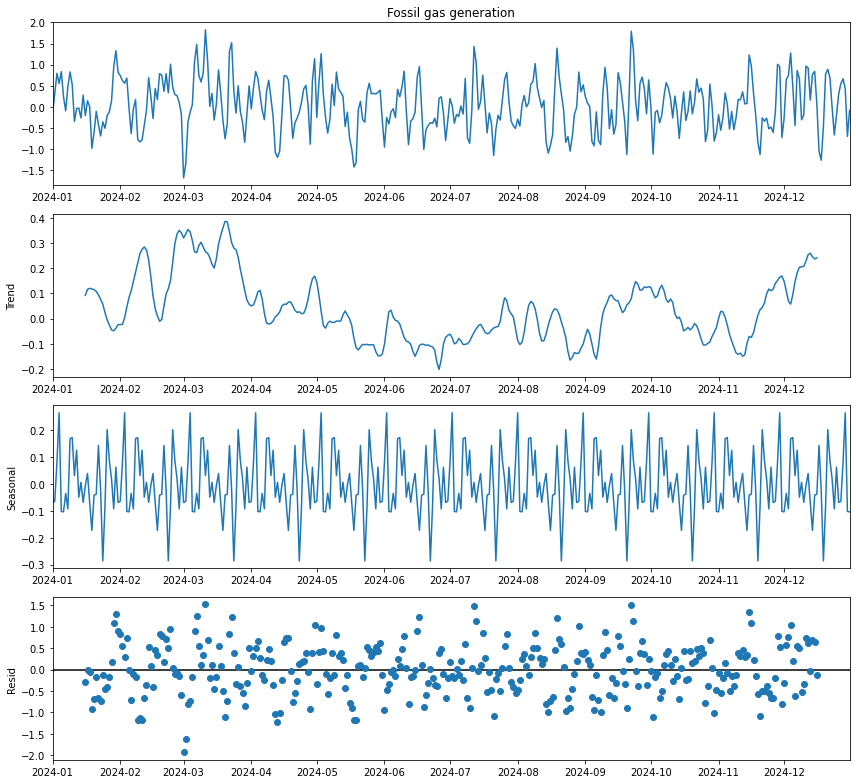

In [79]:
tsa_decomposed = sm.tsa.seasonal_decompose(synthetic_data_frame['Fossil gas generation'],  period = 30, model='additive') 
#additive because Seasonal grow is almost varying around 0

plt.rcParams['figure.figsize'] = 12, 11
fig = tsa_decomposed.plot()
plt.show()

In [80]:
synthetic_data_frame['resid']= tsa_decomposed.resid
synthetic_data_frame['trend']= tsa_decomposed.trend
synthetic_data_frame['seasonal']= tsa_decomposed.seasonal

synthetic_data_frame['observed']= tsa_decomposed.observed

In [81]:
synthetic_data_frame.dropna()

Fossil gas generation     resid     trend  seasonal  observed
Date                                                                     
2024-01-16              -0.204468 -0.290951  0.092505 -0.006021 -0.204468
2024-01-17               0.144860 -0.009984  0.116102  0.038742  0.144860
2024-01-18               0.000014 -0.049968  0.120392 -0.070410  0.000014
2024-01-19              -0.979950 -0.924713  0.117606 -0.172843 -0.979950
2024-01-20              -0.611294 -0.685004  0.115168 -0.041459 -0.611294
...                           ...       ...       ...       ...       ...
2024-12-12               0.923500  0.630498  0.254260  0.038742  0.923500
2024-12-13               0.160692 -0.028752  0.259854 -0.070410  0.160692
2024-12-14               0.773602  0.700986  0.245458 -0.172843  0.773602
2024-12-15               0.841142  0.645319  0.237282 -0.041459  0.841142
2024-12-16               0.067410 -0.135425  0.240985 -0.038150  0.067410

[336 rows x 5 columns]

In [82]:
#Credits: ChatGPT
# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(synthetic_data_frame['resid'], lags=10)  # Test autocorrelation up to lag 10

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")


No significant autocorrelation detected in residuals.


#### Comment: Model is a good fit as the residuals are not autocorrelated.

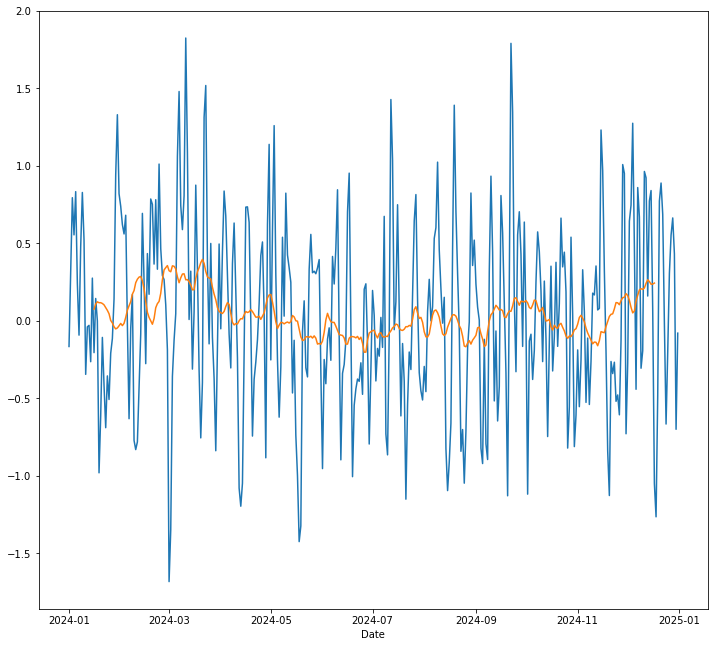

In [83]:
#Credits: Prof. Dr. Lämmle for teaching moving average, used the code taught in lecture.
#seeing whether additive or multiplicative model will fit
synthetic_data_frame['Fossil gas generation'].plot()
synthetic_data_frame['moving_average']=synthetic_data_frame['Fossil gas generation'].rolling(window=30, center=True).mean() #set window to 15 mins for annual values
synthetic_data_frame['moving_average'].plot()
plt.show()

### Residuals: Done this as ARIMA results are giving predictions like residuals.

In [84]:
# Fit an ARIMA model to the historical data
order = (2, 0, 2)
model = ARIMA(df['resid'], order=order)
fitted_model1 = model.fit()

In [85]:
# Get the AR and MA parameters from the fitted model
ar_params = fitted_model1.arparams
ma_params = fitted_model1.maparams

# Generate synthetic data for future time periods
synthetic_data = arma_generate_sample(ar=ar_params, ma=ma_params, nsample=366)

In [86]:
import datetime

# Define the start and end dates for the year 2024
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 12, 31)

dates_2024 = []

current_date = start_date
while current_date <= end_date:
    dates_2024.append(current_date)
    current_date += datetime.timedelta(days=1)

# Convert the list of dates to an array if needed
dates_2024_array = np.array(dates_2024)

In [87]:
synthetic_data_frame=pd.DataFrame()
synthetic_data_frame['Date']=dates_2024_array
synthetic_data_frame['Residuals']=synthetic_data

In [88]:
synthetic_data_frame.set_index('Date', inplace=True)

In [89]:
synthetic_data_frame

Residuals
Date                 
2024-01-01   0.071737
2024-01-02  -0.114077
2024-01-03  -0.375655
2024-01-04  -0.136787
2024-01-05   0.111823
...               ...
2024-12-27   0.182871
2024-12-28   0.319465
2024-12-29  -0.326487
2024-12-30  -0.273174
2024-12-31   0.549136

[366 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

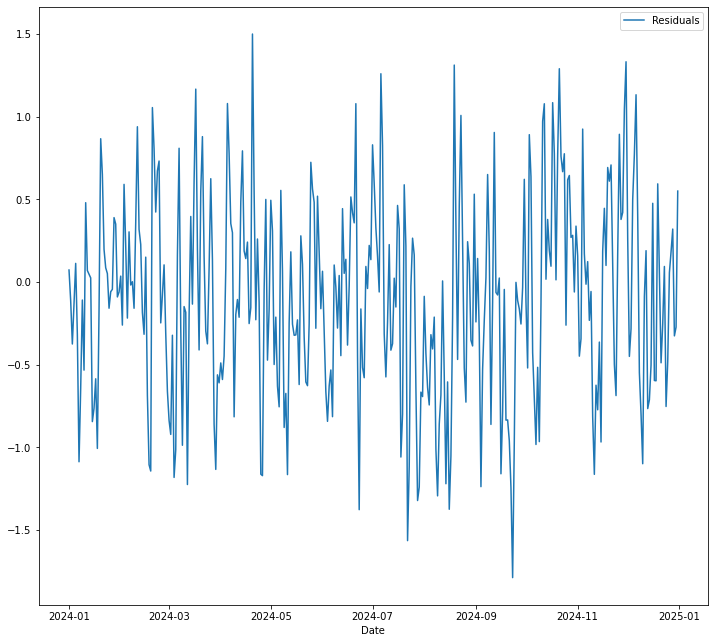

In [90]:
synthetic_data_frame.plot()

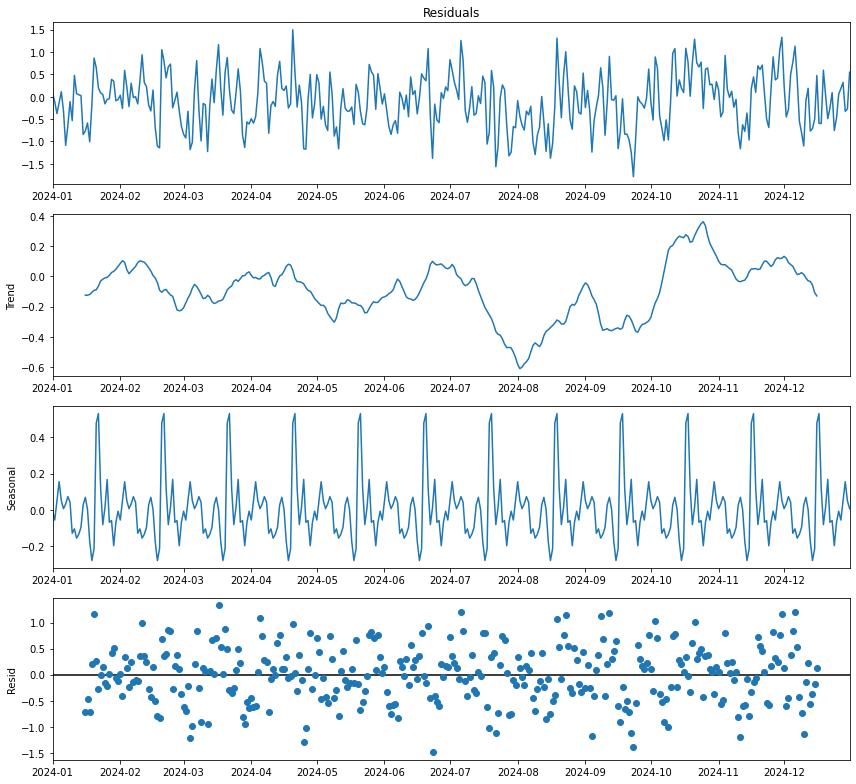

In [91]:
tsa_decomposed = sm.tsa.seasonal_decompose(synthetic_data_frame['Residuals'],  period = 30, model='additive') 
#additive because Seasonal grow is almost varying around 0

plt.rcParams['figure.figsize'] = 12, 11
fig = tsa_decomposed.plot()
plt.show()

In [92]:
synthetic_data_frame['resid']= tsa_decomposed.resid
synthetic_data_frame['trend']= tsa_decomposed.trend
synthetic_data_frame['seasonal']= tsa_decomposed.seasonal

synthetic_data_frame['observed']= tsa_decomposed.observed

In [93]:
synthetic_data_frame.dropna()

Residuals     resid     trend  seasonal  observed
Date                                                         
2024-01-16  -0.763749 -0.708677 -0.124395  0.069324 -0.763749
2024-01-17  -0.586027 -0.464377 -0.124135  0.002485 -0.586027
2024-01-18  -1.007098 -0.715046 -0.119745 -0.172307 -1.007098
2024-01-19  -0.175393  0.208301 -0.105731 -0.277963 -0.175393
2024-01-20   0.865755  1.170779 -0.091859 -0.213166  0.865755
...               ...       ...       ...       ...       ...
2024-12-12   0.188706  0.214576 -0.028355  0.002485  0.188706
2024-12-13  -0.766110 -0.560522 -0.033281 -0.172307 -0.766110
2024-12-14  -0.713310 -0.377556 -0.057792 -0.277963 -0.713310
2024-12-15  -0.502745 -0.182216 -0.107363 -0.213166 -0.502745
2024-12-16   0.475227  0.127151 -0.129292  0.477367  0.475227

[336 rows x 5 columns]

In [94]:
#Credits: ChatGPT
# Perform the Ljung-Box test
test_statistic, p_value = acorr_ljungbox(synthetic_data_frame['resid'], lags=10)  # Test autocorrelation up to lag 10

# Compare the test statistic with the critical value (using a significance level of 0.05)
critical_value = 0.05
if any(p_value < critical_value):
    print("Autocorrelation detected in residuals.")
else:
    print("No significant autocorrelation detected in residuals.")


No significant autocorrelation detected in residuals.


#### Comment: Model is a good fit as the residuals are not autocorrelated.

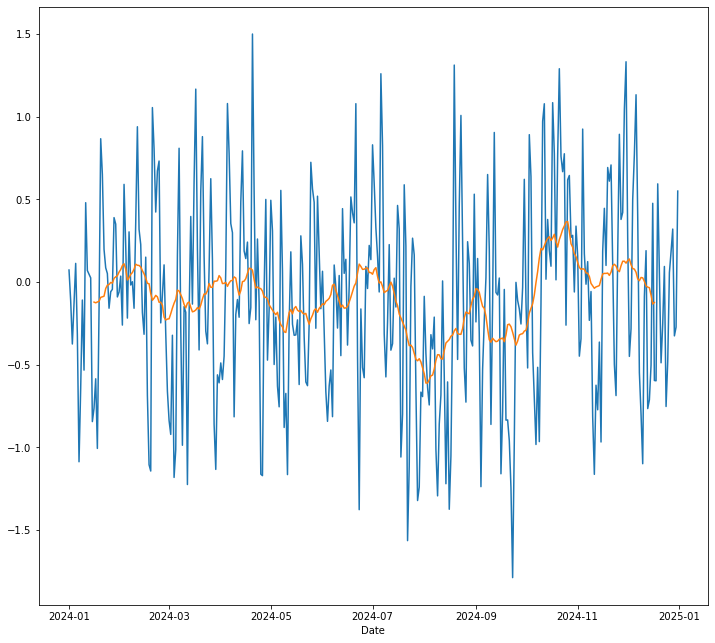

In [95]:
#Credits: Prof. Dr. Lämmle for teaching moving average, used the code taught in lecture.
#seeing whether additive or multiplicative model will fit
synthetic_data_frame['Residuals'].plot()
synthetic_data_frame['moving_average']=synthetic_data_frame['Residuals'].rolling(window=30, center=True).mean() #set window to 15 mins for annual values
synthetic_data_frame['moving_average'].plot()
plt.show()

Mean of Residuals: -0.09857289804924262
Variance of Residuals: 0.35903220730137836


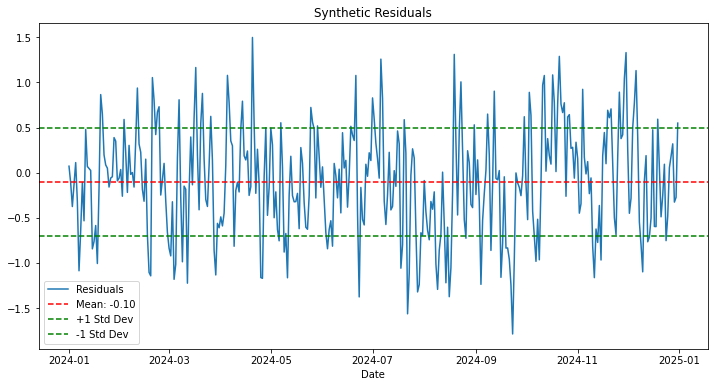

In [96]:
# Now, calculate mean and variance
mean_residuals = synthetic_data_frame['Residuals'].mean()
variance_residuals = synthetic_data_frame['Residuals'].var()

print(f"Mean of Residuals: {mean_residuals}")
print(f"Variance of Residuals: {variance_residuals}")

# Plotting residuals
plt.figure(figsize=(12, 6))
synthetic_data_frame['Residuals'].plot(title='Synthetic Residuals')
plt.axhline(mean_residuals, color='red', linestyle='--', label=f"Mean: {mean_residuals:.2f}")
plt.axhline(mean_residuals + np.sqrt(variance_residuals), color='green', linestyle='--', label=f"+1 Std Dev")
plt.axhline(mean_residuals - np.sqrt(variance_residuals), color='green', linestyle='--', label=f"-1 Std Dev")
plt.legend()
plt.show()

## Documentation:

#### Percentage of contribution:
##### -- Task 1:- Nooreldin: 95%, Saurav B: 5%
##### -- Task 2:- Saurav B: 95%, Nooreldin: 5%
##### -- Task 3:- Saurav B: 5%, Nooreldin: 95%
##### -- Task 4:- Saurav B: 90%, Nooreldin: 10%
##### -- Task 5:- Saurav B: 55%, Nooreldin: 45%

#### Use of ChatGPT is mentioned in the comments of the code.

#### Use of lecture codes and Datacamp has been mentioned in the comments of the code.